************
<font color=#f26430 font size="+3"><center><b> Notebook Analyse Exploratoire</b></center></font><br>
<font color=#f2790f font size="+2.5"><center><b> PROJET n° 6 : Classifiez automatiquement des biens de consommation
</b></center></font>
************   

# <font color=#f26430 >CONTEXTE</font> :

Notre **client**, l’**entreprise "Place de marché”**, souhaite **lancer** une **marketplace e-commerce**.<br>
Sur la place de marché, des **vendeurs proposent des articles à des acheteurs** en **postant** une **photo** et une **description**.<br><br>
**Pour l'instant**, l'**attribution** de **la catégorie d'un article est effectuée manuellement** par les vendeurs et est donc peu fiable.<br>

Dans l'optique d'un **passage à l'échelle**, il devient **nécessaire d'automatiser cette tâche** afin **rendre l’expérience utilisateur la plus fluide possible** :<br>
- **faciliter** la **mis** en **ligne de nouveaux articles** par les **vendeurs**.<br>
- **faciliter** la **recherche de produits** pour les **clients**.<br>
*********
# <font color=#f26430 >DATASET</font> :
Le **dataset** est disponible sur le site suivant : [link](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Textimage+DAS+V2/Dataset+projet+pre%CC%81traitement+textes+images.zip).<br>
Ce dataset contient **les données d’articles** avec le **lien** pour **télécharger la photo et une description associée**.
**********
# <font color=#f26430 >BESOIN CLIENT</font> :
* **Réaliser** une première **étude de faisabilité d'un moteur de classification d'articles** basé sur une **image** et une **description** pour l'automatisation de l'attribution de la catégorie de l'article, **avec un niveau de précision suffisant**.

**********
# <font color=#f26430 >MISSION</font> :

- [ ] **Réaliser** un **prétraitement** des **données textes**.
- [ ] **Réaliser** un **prétraitement** des **données images**.
- [ ] **Réaliser**  une **réduction de dimension**, **puis un clustering**.
- [ ] **Répresenter** le **résultat** du **clustering** en **deux dimensions à déterminer**, afin d’illustrer le fait que les caractéristiques extraites permettent de regrouper des produits de même catégorie.
- [ ] **Mettre en place** des **fonctions pour automatiser** le **traitement** des **images** et des **descriptions**.
<br>
**********
# <font color=#f26430 >CONTRAINTES</font> :
* **Utiliser à minima** un algorithme de type **SIFT / ORB / SURF pour d’extraire les features**.
* **Un algorithme de type CNN Transfer Learning** peut éventuellement être utilisé **en complément**, **s’il peut apporter un éclairage supplémentaire** à la démonstration.
<br>
**********

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#CONTEXTE-:" data-toc-modified-id="CONTEXTE-:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><font color="#f26430">CONTEXTE</font> :</a></span></li><li><span><a href="#DATASET-:" data-toc-modified-id="DATASET-:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><font color="#f26430">DATASET</font> :</a></span></li><li><span><a href="#BESOIN-CLIENT-:" data-toc-modified-id="BESOIN-CLIENT-:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><font color="#f26430">BESOIN CLIENT</font> :</a></span></li><li><span><a href="#MISSION-:" data-toc-modified-id="MISSION-:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><font color="#f26430">MISSION</font> :</a></span></li><li><span><a href="#CONTRAINTES-:" data-toc-modified-id="CONTRAINTES-:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><font color="#f26430">CONTRAINTES</font> :</a></span></li><li><span><a href="#
----Chapitre-1-:-Charger-les-datasets
--------
----" data-toc-modified-id="
----Chapitre-1-:-Charger-les-datasets
--------
-----6"><span class="toc-item-num">6&nbsp;&nbsp;</span>
    <font color="#f26430">Chapitre 1 : Charger les datasets
        </font>
    </a></span><ul class="toc-item"><li><span><a href="#-Explorer-le-dataset" data-toc-modified-id="-Explorer-le-dataset-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span><font color="#f2790f"> Explorer le dataset</font></a></span></li><li><span><a href="#-Extraire-les-catégories-de-produits-de-la-colonne-product_category_tree" data-toc-modified-id="-Extraire-les-catégories-de-produits-de-la-colonne-product_category_tree-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span><font color="#f2790f"> Extraire les catégories de produits de la colonne <code>product_category_tree</code></font></a></span></li></ul></li><li><span><a href="#
----Chapitre-2-:-Méthode-classique
--------
----" data-toc-modified-id="
----Chapitre-2-:-Méthode-classique
--------
-----7"><span class="toc-item-num">7&nbsp;&nbsp;</span>
    <font color="#f26430">Chapitre 2 : Méthode classique
        </font>
    </a></span><ul class="toc-item"><li><span><a href="#-Prétraitement-des-données-textes" data-toc-modified-id="-Prétraitement-des-données-textes-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span><font color="#f2790f"> Prétraitement des données textes</font></a></span><ul class="toc-item"><li><span><a href="#Nettoyage-des-données-textuelles---Bag-of-Words" data-toc-modified-id="Nettoyage-des-données-textuelles---Bag-of-Words-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span><font color="#f29966">Nettoyage des données textuelles - Bag of Words</font></a></span></li><li><span><a href="#-Extraction-des-features-des-données-textuelles---TF-IDF" data-toc-modified-id="-Extraction-des-features-des-données-textuelles---TF-IDF-7.1.2"><span class="toc-item-num">7.1.2&nbsp;&nbsp;</span><font color="#f29966"> Extraction des features des données textuelles - TF-IDF</font></a></span></li></ul></li><li><span><a href="#-Prétraitement-des-données-images" data-toc-modified-id="-Prétraitement-des-données-images-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span><font color="#f2790f"> Prétraitement des données images</font></a></span><ul class="toc-item"><li><span><a href="#Créations-des-descripteurs-de-chaque-image" data-toc-modified-id="Créations-des-descripteurs-de-chaque-image-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span><font color="#f29966">Créations des descripteurs de chaque image</font></a></span></li><li><span><a href="#Création-des-clusters-de-descripteurs" data-toc-modified-id="Création-des-clusters-de-descripteurs-7.2.2"><span class="toc-item-num">7.2.2&nbsp;&nbsp;</span><font color="#f29966">Création des clusters de descripteurs</font></a></span></li><li><span><a href="#Création-des-features-des-images---Bag-of-Visual-Words" data-toc-modified-id="Création-des-features-des-images---Bag-of-Visual-Words-7.2.3"><span class="toc-item-num">7.2.3&nbsp;&nbsp;</span><font color="#f29966">Création des features des images - Bag of Visual Words</font></a></span></li><li><span><a href="#Concaténation-des-features-texte-et-images" data-toc-modified-id="Concaténation-des-features-texte-et-images-7.2.4"><span class="toc-item-num">7.2.4&nbsp;&nbsp;</span><font color="#f29966">Concaténation des features texte et images</font></a></span></li></ul></li><li><span><a href="#-Clustering-des-features" data-toc-modified-id="-Clustering-des-features-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span><font color="#f2790f"> Clustering des features</font></a></span><ul class="toc-item"><li><span><a href="#Réduction-de-dimensions-avec-PcMAP" data-toc-modified-id="Réduction-de-dimensions-avec-PcMAP-7.3.1"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span><font color="#f29966">Réduction de dimensions avec PcMAP</font></a></span></li><li><span><a href="#Clustering-avec-K-Means" data-toc-modified-id="Clustering-avec-K-Means-7.3.2"><span class="toc-item-num">7.3.2&nbsp;&nbsp;</span><font color="#f29966">Clustering avec K-Means</font></a></span></li><li><span><a href="#Similarité-entre-les-vraies-classes-et-les-clusters" data-toc-modified-id="Similarité-entre-les-vraies-classes-et-les-clusters-7.3.3"><span class="toc-item-num">7.3.3&nbsp;&nbsp;</span><font color="#f29966">Similarité entre les vraies classes et les clusters</font></a></span></li><li><span><a href="#Clustering-avec-NMF" data-toc-modified-id="Clustering-avec-NMF-7.3.4"><span class="toc-item-num">7.3.4&nbsp;&nbsp;</span><font color="#f29966">Clustering avec NMF</font></a></span></li><li><span><a href="#Similarité-entre-les-vraies-classes-et-les-clusters" data-toc-modified-id="Similarité-entre-les-vraies-classes-et-les-clusters-7.3.5"><span class="toc-item-num">7.3.5&nbsp;&nbsp;</span><font color="#f29966">Similarité entre les vraies classes et les clusters</font></a></span></li></ul></li><li><span><a href="#-Clustering-Kmeans-vs-NMF" data-toc-modified-id="-Clustering-Kmeans-vs-NMF-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span><font color="#f2790f"> Clustering Kmeans vs NMF</font></a></span></li></ul></li><li><span><a href="#
----Chapitre-3-:-Méthode-Deep-Learning-(Transfer-learning)
--------
----" data-toc-modified-id="
----Chapitre-3-:-Méthode-Deep-Learning-(Transfer-learning)
--------
-----8"><span class="toc-item-num">8&nbsp;&nbsp;</span>
    <font color="#f26430">Chapitre 3 : Méthode Deep Learning (Transfer learning)
        </font>
    </a></span><ul class="toc-item"><li><span><a href="#-Extraction-de-features-des-données-textulles" data-toc-modified-id="-Extraction-de-features-des-données-textulles-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span><font color="#f2790f"> Extraction de features des données textulles</font></a></span></li><li><span><a href="#-Extraction-de-features-des-images" data-toc-modified-id="-Extraction-de-features-des-images-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span><font color="#f2790f"> Extraction de features des images</font></a></span></li><li><span><a href="#-Réduction-de-dimensions-avec-PcMAP" data-toc-modified-id="-Réduction-de-dimensions-avec-PcMAP-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span><font color="#f2790f"> Réduction de dimensions avec PcMAP</font></a></span></li><li><span><a href="#-Clustering-des-features-" data-toc-modified-id="-Clustering-des-features--8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span><font color="#f2790f"> Clustering des features </font></a></span></li><li><span><a href="#-Similarité-entre-les-vraies-classes-et-les-clusters" data-toc-modified-id="-Similarité-entre-les-vraies-classes-et-les-clusters-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span><font color="#f2790f"> Similarité entre les vraies classes et les clusters</font></a></span></li></ul></li><li><span><a href="#
----Chapitre-4-:-Méthode-classique-vs--Deep-Learning-(Transfer-learning)
--------
----" data-toc-modified-id="
----Chapitre-4-:-Méthode-classique-vs--Deep-Learning-(Transfer-learning)
--------
-----9"><span class="toc-item-num">9&nbsp;&nbsp;</span>
    <font color="#f26430">Chapitre 4 : Méthode classique vs  Deep Learning (Transfer learning)
        </font>
    </a></span><ul class="toc-item"><li><span><a href="#-Comparaison-des-projections-en-2D" data-toc-modified-id="-Comparaison-des-projections-en-2D-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span><font color="#f2790f"> Comparaison des projections en 2D</font></a></span></li><li><span><a href="#-Comparaison-du-Rand-Index" data-toc-modified-id="-Comparaison-du-Rand-Index-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span><font color="#f2790f"> Comparaison du Rand Index</font></a></span></li><li><span><a href="#-Comparaison-des-matrice-de-confusion" data-toc-modified-id="-Comparaison-des-matrice-de-confusion-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span><font color="#f2790f"> Comparaison des matrice de confusion</font></a></span></li></ul></li><li><span><a href="#
----Conclusion
--------
----" data-toc-modified-id="
----Conclusion
--------
-----10"><span class="toc-item-num">10&nbsp;&nbsp;</span>
    <font color="#f26430">Conclusion
        </font>
    </a></span></li></ul></div>

<img src='https://scontent.fcdg2-1.fna.fbcdn.net/v/t1.6435-9/154196282_3653559314697389_4174523554590546826_n.jpg?_nc_cat=111&ccb=1-5&_nc_sid=973b4a&_nc_ohc=H_ViRY_Bnu0AX9J5T4F&_nc_ht=scontent.fcdg2-1.fna&oh=9c1e05e851f669bdf5f9077e7b411367&oe=61B85286' width=60px align="right"/> 
<div style="vertical-align: left">
    <h1>
    <font color=#f26430 >Chapitre 1 : Charger les datasets
        </font>
    </h1>
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer

# Import Garbage Collection to free RAM
import gc

%matplotlib inline

In [2]:
# Enable automatic garbage collection.
gc.enable()

In [3]:
# nltk.download('stopwords')
# nltk.download('wordnet')

## <font color=#f2790f> Explorer le dataset</font>

In [22]:
data = pd.read_csv(
    "0_data/Flipkart/flipkart_com-ecommerce_sample_1050.csv", encoding="utf-8"
)

* **Visualiser le dataset**

In [5]:
data.head(2)

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   

        product_rating       overall_rating     brand  \
0  No rating available  No rating available  Elegance   
1  No rating available  No rating available  Sathiyas   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...

* **Dimensions du dataset**

In [6]:
data.shape

(1050, 15)

*  **Vérification de la présence de valeurs manquantes**

In [7]:
round(data.isna().mean().sort_values() * 100, 2)

uniq_id                     0.00
crawl_timestamp             0.00
product_url                 0.00
product_name                0.00
product_category_tree       0.00
pid                         0.00
image                       0.00
is_FK_Advantage_product     0.00
description                 0.00
product_rating              0.00
overall_rating              0.00
retail_price                0.10
discounted_price            0.10
product_specifications      0.10
brand                      32.19
dtype: float64

*  **Vérification de la présence de doublons**

In [8]:
data.duplicated().sum()

0

*  **Visualiser le type de données par colonne**

In [9]:
data.dtypes.sort_values()

is_FK_Advantage_product       bool
retail_price               float64
discounted_price           float64
uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
image                       object
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

*  **Visualiser les colonnes `product_category_tree` et `description`**

In [10]:
data[
    [
        "product_category_tree",
        "description",
    ]
].head()

product_category_tree  \
0  ["Home Furnishing >> Curtains & Accessories >>...   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   

                                         description  
0  Key Features of Elegance Polyester Multicolor ...  
1  Specifications of Sathiyas Cotton Bath Towel (...  
2  Key Features of Eurospa Cotton Terry Face Towe...  
3  Key Features of SANTOSH ROYAL FASHION Cotton P...  
4  Key Features of Jaipur Print Cotton Floral Kin...

In [11]:
data.loc[0, "product_category_tree"].split(">>")

['["Home Furnishing ',
 ' Curtains & Accessories ',
 ' Curtains ',
 ' Elegance Polyester Multicolor Abstract Eyelet Do..."]']

In [12]:
data.loc[0, "description"]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

## <font color=#f2790f> Extraire les catégories de produits de la colonne `product_category_tree`</font>

*  **Quel est le nombre max de sous-catégories ?**

In [13]:
cat_numbers = []
for i in range(data.shape[0]):
    cat_numbers.append(len(data.loc[i, "product_category_tree"].split(">>")))
print("max categories number :", max(cat_numbers))

max categories number : 7


*  **Quel est le nombre de sous-catégories le plus fréquent ?**

In [14]:
print("most frequent categories number :", max(set(cat_numbers), key=cat_numbers.count))

most frequent categories number : 3


> Nous allons extraire de la colonne `product_category_tree` les **3 premières sous-catégories**.

*  **Extraction de la 1ʳᵉ sous-catégorie ?**

In [23]:
data["product_category_1"] = data["product_category_tree"].apply(
    lambda x: x.split('["')[1].split('"]')[0].split(">>")[0]
)

*  **Extraction de la 2ᵉ sous-catégorie ?**

In [24]:
data["product_category_2"] = data["product_category_tree"].apply(
    lambda x: x.split('["')[1].split('"]')[0].split(">>")[1]
)

*  **Extraction de la 3ᵉ sous-catégorie ?**

In [25]:
data["product_category_3"] = data["product_category_tree"].apply(
    lambda x: x.split('["')[1].split('"]')[0].split(">>")[2]
    if len(x.split(">>")) > 2
    else None
)

*  **Visualiser les sous-catégories de produits ?**

In [10]:
data[
    [
        "product_category_tree",
        "product_category_1",
        "product_category_2",
        "product_category_3",
    ]
].head()

product_category_tree product_category_1  \
0  ["Home Furnishing >> Curtains & Accessories >>...   Home Furnishing    
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...         Baby Care    
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...         Baby Care    
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   Home Furnishing    
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   Home Furnishing    

         product_category_2  product_category_3  
0   Curtains & Accessories            Curtains   
1         Baby Bath & Skin    Baby Bath Towels   
2         Baby Bath & Skin    Baby Bath Towels   
3                Bed Linen           Bedsheets   
4                Bed Linen           Bedsheets

*  **Nombre de produits par catégorie?**

In [11]:
for column in ["product_category_1", "product_category_2", "product_category_3"]:
    print("Colonne :", column)
    print("Nombre de catégorie:", data[column].nunique())
    print(data[column].value_counts())
    print("-" * 80)

Colonne : product_category_1
Nombre de catégorie: 7
Home Furnishing                150
Kitchen & Dining               150
Watches                        150
Baby Care                      150
Home Decor & Festive Needs     150
Beauty and Personal Care       150
Computers                      150
Name: product_category_1, dtype: int64
--------------------------------------------------------------------------------
Colonne : product_category_2
Nombre de catégorie: 63
 Wrist Watches                 149
 Laptop Accessories             87
 Infant Wear                    84
 Coffee Mugs                    74
 Showpieces                     71
                              ... 
 Men's Grooming                  1
 Garden & Leisure                1
 Software                        1
 Strollers & Activity Gear       1
 Candles & Fragrances            1
Name: product_category_2, Length: 63, dtype: int64
--------------------------------------------------------------------------------
Colonne : pro

*******************************************
<font color=#000000, size=3>**Dans ce projet, nous allons comparer l'efficacité de 2 méthodes, afin d'identifier celle qui réponds le mieux aux besoins de notre client :**</font>
<br>
- <font color=#f26430, size=3><b> 1. Méthode classique : </b></font>
    * Prétraitement du **texte** avec **Bag-of-Words** & **TF-IDF**.
    * Prétraitement des **images** avec **SIFT**.<br>
<br>
- <font color=#f26430, size=3><b> 2. Deep Learning (neural networks) : </b></font>
    * Prétraitement du **texte** avec un **modèle pré-entrainé** en utilisant la librairie **SBERT**.<br>
    * Prétraitement des **images** avec un **modèle pré-entrainé** en utilisant la librairie **Keras**.<br>
*******************************************

<img src='https://scontent.fcdg2-1.fna.fbcdn.net/v/t1.6435-9/154196282_3653559314697389_4174523554590546826_n.jpg?_nc_cat=111&ccb=1-5&_nc_sid=973b4a&_nc_ohc=H_ViRY_Bnu0AX9J5T4F&_nc_ht=scontent.fcdg2-1.fna&oh=9c1e05e851f669bdf5f9077e7b411367&oe=61B85286' width=60px align="right"/> 
<div style="vertical-align: left">
    <h1>
    <font color=#f26430 >Chapitre 2 : Méthode classique
        </font>
    </h1>
</div>

## <font color=#f2790f> Prétraitement des données textes</font>

### <font color=#f29966>Nettoyage des données textuelles - Bag of Words</font>

*  **Création d'une fonction pour nettoyer les données textuelles :**
    - Case normalization.
    - Tokenization.
    - Remove punctuations.
    - Remove numbers.
    - Remove stop-words.
    - Lemmatization

In [26]:
def preprocess_text(
    dataframe, column_to_be_cleaned, column_to_store_cleaned_text, lemmatize
):
    """
    This function takes as input a dataframe column to clean on which several
    NLTK algorithms will be applied in order to preprocess it
    Then the cleaned texte will be stored in an new column
    """
    pd.options.display.max_colwidth = None

    print("-" * 100)
    print("Text sample before cleaning")
    print("-" * 100)
    print(dataframe.loc[0, column_to_be_cleaned])

    # lower case
    dataframe[column_to_store_cleaned_text] = dataframe[column_to_be_cleaned].apply(
        lambda x: str(x).lower()
    )

    print("-" * 100)
    print("Step 1 : Case nomalization")
    print("-" * 100)
    print(dataframe.loc[0, column_to_store_cleaned_text])

    # word tokenize
    dataframe[column_to_store_cleaned_text] = dataframe[
        column_to_store_cleaned_text
    ].apply(lambda x: word_tokenize(str(x), language="english"))

    print("-" * 100)
    print("Step 2 : Tokenization")
    print("-" * 100)
    print(dataframe.loc[0, column_to_store_cleaned_text])

    # Remove punctuations and numbers

    dataframe[column_to_store_cleaned_text] = dataframe[
        column_to_store_cleaned_text
    ].apply(lambda x: [word for word in x if word.isalpha()])

    print("-" * 100)
    print("Step 3 : Remove punctuation and reomve numbers")
    print("-" * 100)
    print(dataframe.loc[0, column_to_store_cleaned_text])

    # Remove stop-words
    dataframe[column_to_store_cleaned_text] = dataframe[
        column_to_store_cleaned_text
    ].apply(lambda x: [word for word in x if word not in stopwords.words("english")])

    print("-" * 100)
    print("Step 4 : Remove stop-words")
    print("-" * 100)
    print(dataframe.loc[0, column_to_store_cleaned_text])

    # Lemmatize tokens
    dataframe[column_to_store_cleaned_text] = dataframe[
        column_to_store_cleaned_text
    ].apply(lambda x: [lemmatize.lemmatize(word, pos="n") for word in x])
    dataframe[column_to_store_cleaned_text] = dataframe[
        column_to_store_cleaned_text
    ].apply(lambda x: [lemmatize.lemmatize(word, pos="v") for word in x])

    print("-" * 100)
    print("Step 5 : Lemmatization")
    print("-" * 100)
    print(dataframe.loc[0, column_to_store_cleaned_text])

    # Clean rows
    dataframe[column_to_store_cleaned_text] = dataframe[
        column_to_store_cleaned_text
    ].apply(lambda x: " ".join(x))

    print("-" * 100)
    print("Step 6 : Final result")
    print("-" * 100)
    print(dataframe.loc[0, column_to_store_cleaned_text])

    pd.reset_option("display.max_colwidth")

    return None

*  **Nettoyage de colonne `description` et visualisation d'un exemple du traitement des données**

In [27]:
%%time
preprocess_text(
    dataframe=data,
    column_to_be_cleaned="description",
    column_to_store_cleaned_text="description_cleaned",
    lemmatize=WordNetLemmatizer(),
)

----------------------------------------------------------------------------------------------------
Text sample before cleaning
----------------------------------------------------------------------------------------------------
Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning

----------------------------------------------------------------------------------------------------
Step 5 : Lemmatization
----------------------------------------------------------------------------------------------------
['key', 'feature', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'cm', 'height', 'pack', 'price', 'r', 'curtain', 'enhance', 'look', 'curtain', 'make', 'high', 'quality', 'polyester', 'feature', 'eyelet', 'style', 'stitch', 'metal', 'make', 'room', 'environment', 'romantic', 'curtain', 'wrinkle', 'anti', 'shrinkage', 'elegant', 'home', 'bright', 'modernistic', 'appeal', 'design', 'surreal', 'attention', 'sure', 'steal', 'heart', 'contemporary', 'eyelet', 'valance', 'curtain', 'slide', 'smoothly', 'draw', 'apart', 'first', 'thing', 'morning', 'welcome', 'bright', 'sun', 'ray', 'want', 'wish', 'good', 'morning', 'whole', 'world', 'dra

In [15]:
data[["description", "description_cleaned"]].head()

description  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel (...   
2  Key Features of Eurospa Cotton Terry Face Towe...   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4  Key Features of Jaipur Print Cotton Floral Kin...   

                                 description_cleaned  
0  key feature elegance polyester multicolor abst...  
1  specification sathiyas cotton bath towel bath ...  
2  key feature eurospa cotton terry face towel se...  
3  key feature santosh royal fashion cotton print...  
4  key feature jaipur print cotton floral king si...

### <font color=#f29966> Extraction des features des données textuelles - TF-IDF</font>

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
# Create TfidfVectorizer.
vectorizer = TfidfVectorizer()

# Learn vocabulary and idf, return document-term matrix.
text_vector = vectorizer.fit_transform(data["description_cleaned"])
text_features = text_vector.toarray()

In [30]:
text_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
text_features.shape

(1050, 3983)

In [32]:
data.shape

(1050, 19)

In [33]:
# Get vocabularies.
# vectorizer.vocabulary_

In [34]:
# Sort vocabularies.
{k: v for k, v in sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1])}

{'aa': 0,
 'aaa': 1,
 'aapno': 2,
 'aari': 3,
 'aarika': 4,
 'abide': 5,
 'ability': 6,
 'able': 7,
 'abrasion': 8,
 'abroad': 9,
 'absolute': 10,
 'absorb': 11,
 'absorbency': 12,
 'absorbent': 13,
 'absorber': 14,
 'abstract': 15,
 'abstrcts': 16,
 'ac': 17,
 'accent': 18,
 'access': 19,
 'accessory': 20,
 'accident': 21,
 'accidental': 22,
 'accommodate': 23,
 'accomplish': 24,
 'accord': 25,
 'acer': 26,
 'ache': 27,
 'acid': 28,
 'acne': 29,
 'across': 30,
 'acrylic': 31,
 'act': 32,
 'active': 33,
 'actual': 34,
 'adaa': 35,
 'adapter': 36,
 'adaptor': 37,
 'add': 38,
 'addiction': 39,
 'addition': 40,
 'additional': 41,
 'additionally': 42,
 'adhesive': 43,
 'adi': 44,
 'adidas': 45,
 'adino': 46,
 'adjust': 47,
 'adjustable': 48,
 'admiration': 49,
 'admire': 50,
 'adorable': 51,
 'adorn': 52,
 'adsl': 53,
 'advance': 54,
 'advice': 55,
 'advisable': 56,
 'aero': 57,
 'affect': 58,
 'affordable': 59,
 'afternoon': 60,
 'agarwood': 61,
 'age': 62,
 'ageless': 63,
 'agrasen': 64,

## <font color=#f2790f> Prétraitement des données images</font>

*  **Import OpenCV library**

In [35]:
import cv2

*  **Créer une liste avec le chemin pour accéder aux photos**

In [36]:
# Create pathnames from Imgae ID
images_path = ["0_data/Flipkart/Images/" + fname for fname in data["image"]]

In [37]:
images_path[:10]

['0_data/Flipkart/Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg',
 '0_data/Flipkart/Images/7b72c92c2f6c40268628ec5f14c6d590.jpg',
 '0_data/Flipkart/Images/64d5d4a258243731dc7bbb1eef49ad74.jpg',
 '0_data/Flipkart/Images/d4684dcdc759dd9cdf41504698d737d8.jpg',
 '0_data/Flipkart/Images/6325b6870c54cd47be6ebfbffa620ec7.jpg',
 '0_data/Flipkart/Images/893aa5ed55f7cff2eccea7758d7a86bd.jpg',
 '0_data/Flipkart/Images/f355cc1ccb08bd0d283ed979b7ee7515.jpg',
 '0_data/Flipkart/Images/dd0e3470a7e6ed76fd69c2da27721041.jpg',
 '0_data/Flipkart/Images/41384da51732c0b4df3de8f395714fbb.jpg',
 '0_data/Flipkart/Images/710ed5f2393a4b9e8823aa0029f71f93.jpg']

### <font color=#f29966>Créations des descripteurs de chaque image</font>

*  **Création d'une fonction pour traitement des données images**
    - Conversion en gris.
    - Egalisation de l'histogramme de chaque image.
    - Extraction des keypoints et descriptors de chaque image.
    - Création d'une liste de descripteurs par image (qui sera utilisée pour la création de features par image).
    - Création d'une liste de descripteurs pour l'ensemble des images (qui sera utilisée pour le clustering).

In [25]:
from tqdm.notebook import tqdm

*  **Extraction des keypoints et descriptors de chaque image**

In [26]:
def preprocess_image(path_image):

    """
    This function takes a list with the path of pictures to be processed.
    The method SIFT from OpenCV algorithms is used to pre-process pictures & extract keypoints and descriptors.
    The fuction returns an array of descriptors per image & a concatenated array of all descriptors.
    """
    # Liste des descripteurs par image
    sift_keypoints = []

    # compteur
    i = 0

    # Initialisation d'un feature extracteur SIFT
    sift = cv2.xfeatures2d.SIFT_create()

    for image in tqdm(path_image):

        # Chargement de l'image
        img_vo = cv2.imread(image)

        # Convertir la couleur de l'image en gris
        img_gray = cv2.cvtColor(img_vo, cv2.COLOR_BGR2GRAY)

        #     # Egaliser l'histogramme de l'image - CLAHE (Contrast Limited Adaptive Histogram Equalization)
        #     # img_vo_equ = cv2.equalizeHist(img_gray)

        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

        equalized_img = clahe.apply(img_gray)

        # Enregister l'image après égalisation de l'histogramme
        cv2.imwrite("img_vo_equ.jpg", equalized_img)

        #     # Chargement de l'image après égalisation de l'histogramme
        img_vo_equ = cv2.imread("img_vo_equ.jpg")
        img_vo_equ_copy = img_vo_equ.copy()

        # Detection des features (keypoints et leurs descripteurs)
        keypoints, descriptors = sift.detectAndCompute(img_vo_equ, None)

        # Grouper dans une liste les decripteurs de chaque image
        sift_keypoints.append(descriptors)

        # Enregistrement des keypoints pour visualisation
        img_keypoints = cv2.drawKeypoints(img_vo, keypoints, None)

        if i == 20:
            #  Plotting Images
            fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(14, 7))

            # Image original version
            ax[0].imshow(img_vo)
            ax[0].set(title="Exemple d'image")

            # Image gray version
            ax[1].imshow(img_gray)
            ax[1].set(title="Conversion en gris")

            # Image with histograms equalization
            ax[2].imshow(img_vo_equ_copy)
            ax[2].set(title="Egalisation d'histogramme ")

            # Plot Keypoints found on picture
            ax[3].imshow(img_keypoints)
            ax[3].set(title="Keypoints identifiés par SIFT")
            fig.tight_layout()

        # Libérer la RAM
        del img_vo, img_gray, equalized_img, img_vo_equ, img_vo_equ_copy

        gc.collect()
        gc.collect()

        # Incrementer le compteur
        i += 1

    # descripteurs par image
    sift_keypoints_by_img = np.asarray(sift_keypoints, dtype="object")

    # descripteurs pour l'ensemble des images
    sift_keypoints_all = np.concatenate(sift_keypoints_by_img.flatten(), axis=0)

    return sift_keypoints_by_img, sift_keypoints_all

*  **Executer la fonction de pre-traitement des images pour extraire les descripteurs**

  0%|          | 0/1050 [00:00<?, ?it/s]

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 343 has 0 dimension(s)

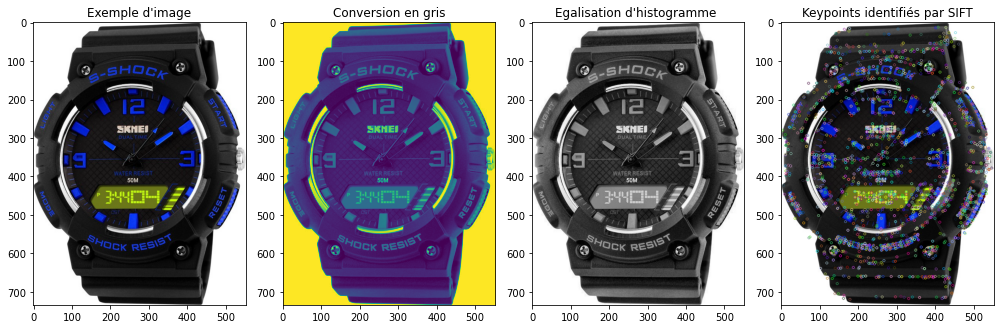

In [35]:
%%time
sift_keypoints_by_img, sift_keypoints_all = preprocess_image(path_image=images_path)

*  **Visualiser l'image n°343.**

In [36]:
# preprocess_image(path_image=images_path[343])

[Text(0.5, 1.0, 'Image n°343 - dimensions nulle')]

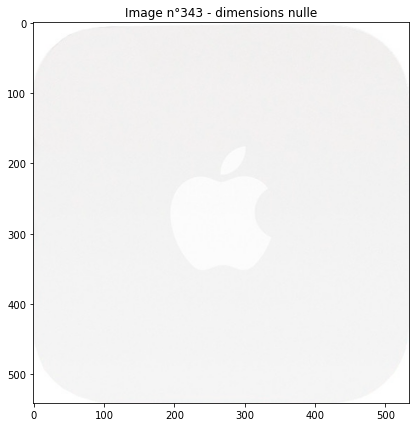

In [37]:
# Chargement de l'image 343
img_343 = cv2.imread(images_path[343])

#  Plotting Images
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 7))

# Image original version
ax.imshow(img_343)
ax.set(title="Image n°343 - dimensions nulle")

> Selon cet [article](https://stackoverflow.com/questions/6832257/sift-is-not-finding-any-features-in-reference-image-in-opencv), la methode SIFT n'est pas capable de détecter des keypoints dans l'image n°343, car son plan de couleur est uniforme et donc il n'y pas de points clés.
> Nous allons supprimer cette image de notre jeu de données.

*  **Supprimer le descripteur et l'image à l'indice 343, car SIFT n'arrive pas à trouver de keypoints dans cette image**

In [38]:
data.loc[343, :]

uniq_id                                     9743e6d1c9f3180483825fe4d2e97836
crawl_timestamp                                    2015-12-01 06:13:00 +0000
product_url                http://www.flipkart.com/apple-airport-express-...
product_name               Apple AirPort Express Base Station Wireless Ro...
product_category_tree      ["Computers >> Network Components >> Routers >...
pid                                                         RTRDQSSHGP7UGRFC
retail_price                                                            6800
discounted_price                                                        6399
image                                   9743e6d1c9f3180483825fe4d2e97836.jpg
is_FK_Advantage_product                                                 True
description                Buy Apple AirPort Express Base Station Wireles...
product_rating                                                           4.9
overall_rating                                                           4.9

In [39]:
data.drop(index=343, inplace=True)

In [40]:
data.reset_index(drop=True, inplace=True)

In [41]:
del images_path[343]

In [42]:
text_features = np.delete(text_features, 343, axis=0)

In [43]:
text_features.shape

(1049, 3983)

In [44]:
# data.to_csv("data_without_index_343")

In [33]:
data.loc[343, :]

uniq_id                                     6e44d107ee32412243b19b0ed9b415f3
crawl_timestamp                                    2015-12-01 06:13:00 +0000
product_url                http://www.flipkart.com/anna-andre-paris-majes...
product_name                    Anna Andre Paris Majesty Deodorant Combo Set
product_category_tree      ["Beauty and Personal Care >> Fragrances >> De...
pid                                                         CAGE22EETSQPZKZA
retail_price                                                             360
discounted_price                                                         199
image                                   6e44d107ee32412243b19b0ed9b415f3.jpg
is_FK_Advantage_product                                                False
description                Flipkart.com: Buy Anna Andre Paris Majesty Deo...
product_rating                                                           3.1
overall_rating                                                           3.1

*  **Executer la fonction de pre-traitement des images pour extraire les descripteurs**

  0%|          | 0/1049 [00:00<?, ?it/s]

Wall time: 28min 45s


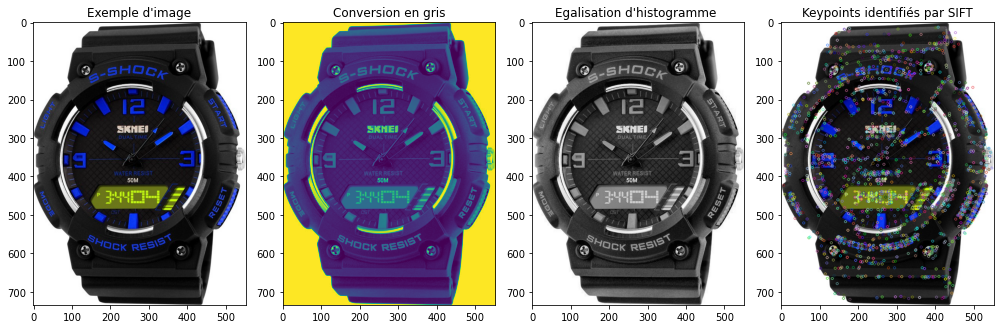

In [46]:
%%time
sift_descripotrs_by_img, sift_descripotrs_all = preprocess_image(path_image=images_path)

In [47]:
sift_descripotrs_by_img.shape, sift_descripotrs_by_img.ndim

((1049,), 1)

In [48]:
sift_descripotrs_all.shape, sift_descripotrs_all.ndim

((9028577, 128), 2)

### <font color=#f29966>Création des clusters de descripteurs</font>

> Code de source provenant du webinaire [OpenClassRooms](https://s3-eu-west-1.amazonaws.com/course.oc-static.com/projects/Webinars/Data/AI_Avril_2021/Weather_first_analysis_V1.0.ipynb)

In [49]:
%%time

from sklearn.cluster import MiniBatchKMeans

k = int(round(np.sqrt(len(sift_descripotrs_all)), 0))
print("Création de", k, "clusters de descripteurs ...")

# Clustering
kmeans = MiniBatchKMeans(
    n_clusters=k, init_size=3 * k, init="k-means++", batch_size=2500, random_state=42
)

kmeans.fit(sift_descripotrs_all)

Création de 3005 clusters de descripteurs ...
Wall time: 29min 26s


MiniBatchKMeans(batch_size=2500, init_size=9015, n_clusters=3005,
                random_state=42)

*  **Sauvgarder le model entrainé de MiniBatchKMeans**

In [50]:
# save the model
import pickle

pickle.dump(kmeans, open("miniBatchKmeans.pkl", "wb"))

### <font color=#f29966>Création des features des images - Bag of Visual Words</font>

* Pour chaque image : 
   - Prédiction des numéros de cluster de chaque descripteur
   - Création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image
   - Features d'une image = Histogramme d'une image = Comptage pour une image du nombre de descripteurs par cluster

> Code de source provenant du webinaire [OpenClassRooms](https://s3-eu-west-1.amazonaws.com/course.oc-static.com/projects/Webinars/Data/AI_Avril_2021/Weather_first_analysis_V1.0.ipynb)

In [51]:
# Creation of histograms (features)
def build_histogram(kmeans, descriptors, image_num):
    res = kmeans.predict(descriptors)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des = len(descriptors)
    if nb_des == 0:
        print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0 / nb_des
    return hist

> Code de source provenant du webinaire [OpenClassRooms](https://s3-eu-west-1.amazonaws.com/course.oc-static.com/projects/Webinars/Data/AI_Avril_2021/Weather_first_analysis_V1.0.ipynb)

In [52]:
%%time

# Creation of a matrix of histograms
hist_vectors = []

for i, image_desc in enumerate(sift_descripotrs_by_img):
    hist = build_histogram(kmeans, image_desc, i)  # calculates the histogram
    hist_vectors.append(hist)  # histogram is the feature vector

# Features des images (histogramme de descripteurs)
img_features = np.asarray(hist_vectors)

Wall time: 2min 17s


In [53]:
img_features.shape

(1049, 3005)

### <font color=#f29966>Concaténation des features texte et images</font>

In [54]:
data.shape, text_features.shape, img_features.shape

((1049, 19), (1049, 3983), (1049, 3005))

In [55]:
data.ndim, text_features.ndim, img_features.ndim

(2, 2, 2)

In [56]:
features_combined_arrays = np.concatenate((text_features, img_features), axis=1)

In [57]:
features_combined_df = pd.DataFrame(features_combined_arrays, index=data["uniq_id"])

In [58]:
features_combined_df.head(2)

0     1     2     3     4     5     6     \
uniq_id                                                                      
55b85ea15a1536d46b7190ad6fff8ce7   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
7b72c92c2f6c40268628ec5f14c6d590   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                                  7     8     9     ...      6978      6979  \
uniq_id                                             ...                       
55b85ea15a1536d46b7190ad6fff8ce7   0.0   0.0   0.0  ...  0.000211  0.000242   
7b72c92c2f6c40268628ec5f14c6d590   0.0   0.0   0.0  ...  0.000057  0.000609   

                                      6980      6981      6982      6983  \
uniq_id                                                                    
55b85ea15a1536d46b7190ad6fff8ce7  0.000070  0.000081  0.000050  0.000060   
7b72c92c2f6c40268628ec5f14c6d590  0.000742  0.000381  0.000533  0.000609   

                                      6984      6985      6986      6987  
uniq_id                                                                   
55b85ea15a1536d46b7190ad6fff8ce7  0.000020  0.000141  0.000060  0.000101  
7b72c92c2f6c40268628ec5f14c6d590  0.000381  0.000057  0.000343  0.000076  

[2 rows x 6988 columns]

In [59]:
features_combined_df.shape

(1049, 6988)

*  **Sauvgarder le dataframe avec les features texte et images**

In [60]:
features_combined_df.to_csv("features_combined_df.csv")

In [8]:
features_combined_df = pd.read_csv("features_combined_df.csv", index_col="uniq_id")

In [9]:
features_combined_df.head()

0    1    2    3    4    5    6    7    8  \
uniq_id                                                                         
55b85ea15a1536d46b7190ad6fff8ce7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7b72c92c2f6c40268628ec5f14c6d590  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
64d5d4a258243731dc7bbb1eef49ad74  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
d4684dcdc759dd9cdf41504698d737d8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6325b6870c54cd47be6ebfbffa620ec7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                                    9  ...      6978      6979      6980  \
uniq_id                                ...                                 
55b85ea15a1536d46b7190ad6fff8ce7  0.0  ...  0.000211  0.000242  0.000070   
7b72c92c2f6c40268628ec5f14c6d590  0.0  ...  0.000057  0.000609  0.000742   
64d5d4a258243731dc7bbb1eef49ad74  0.0  ...  0.000206  0.001236  0.000824   
d4684dcdc759dd9cdf41504698d737d8  0.0  ...  0.000064  0.002549  0.000127   
6325b6870c54cd47be6ebfbffa620ec7  0.0  ...  0.000060  0.000270  0.000420   

                                      6981      6982      6983      6984  \
uniq_id                                                                    
55b85ea15a1536d46b7190ad6fff8ce7  0.000081  0.000050  0.000060  0.000020   
7b72c92c2f6c40268628ec5f14c6d590  0.000381  0.000533  0.000609  0.000381   
64d5d4a258243731dc7bbb1eef49ad74  0.000103  0.000000  0.000103  0.000103   
d4684dcdc759dd9cdf41504698d737d8  0.000574  0.000319  0.000382  0.000574   
6325b6870c54cd47be6ebfbffa620ec7  0.000330  0.000779  0.000390  0.000390   

                                      6985      6986      6987  
uniq_id                                                         
55b85ea15a1536d46b7190ad6fff8ce7  0.000141  0.000060  0.000101  
7b72c92c2f6c40268628ec5f14c6d590  0.000057  0.000343  0.000076  
64d5d4a258243731dc7bbb1eef49ad74  0.000000  0.001030  0.000309  
d4684dcdc759dd9cdf41504698d737d8  0.000000  0.000828  0.000510  
6325b6870c54cd47be6ebfbffa620ec7  0.000030  0.000779  0.000210  

[5 rows x 6988 columns]

## <font color=#f2790f> Clustering des features</font>

### <font color=#f29966>Réduction de dimensions avec PcMAP</font>

In [10]:
from tqdm.notebook import tqdm

In [11]:
import pacmap

*  **Recherche de la meilleure projection des classes avec PcMAP**

  0%|          | 0/3 [00:00<?, ?it/s]

Wall time: 1min 10s


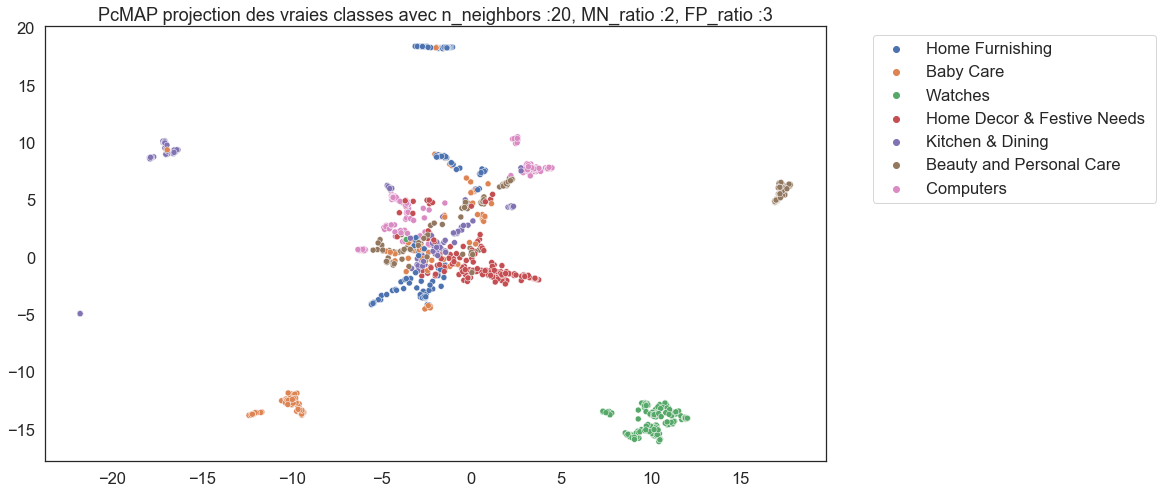

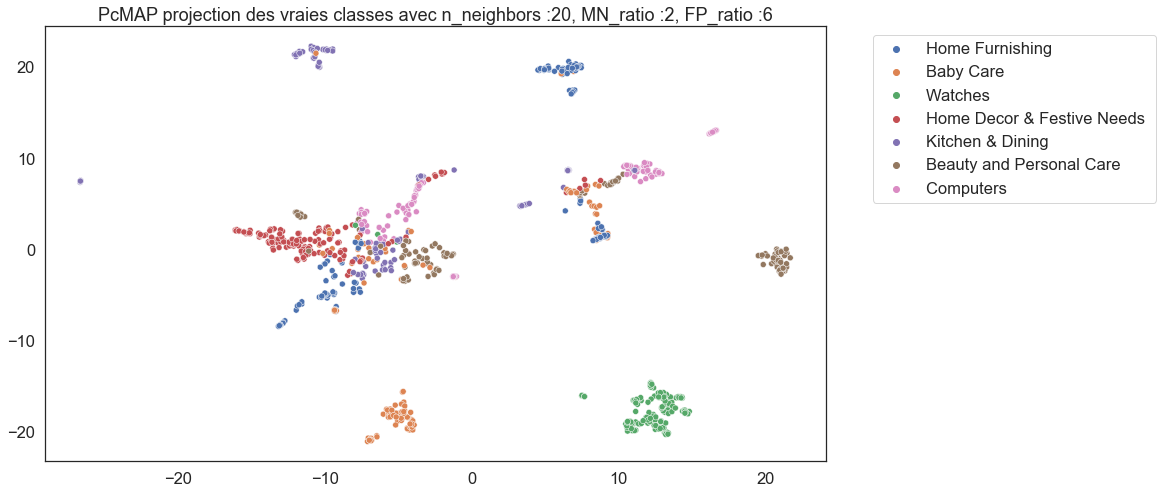

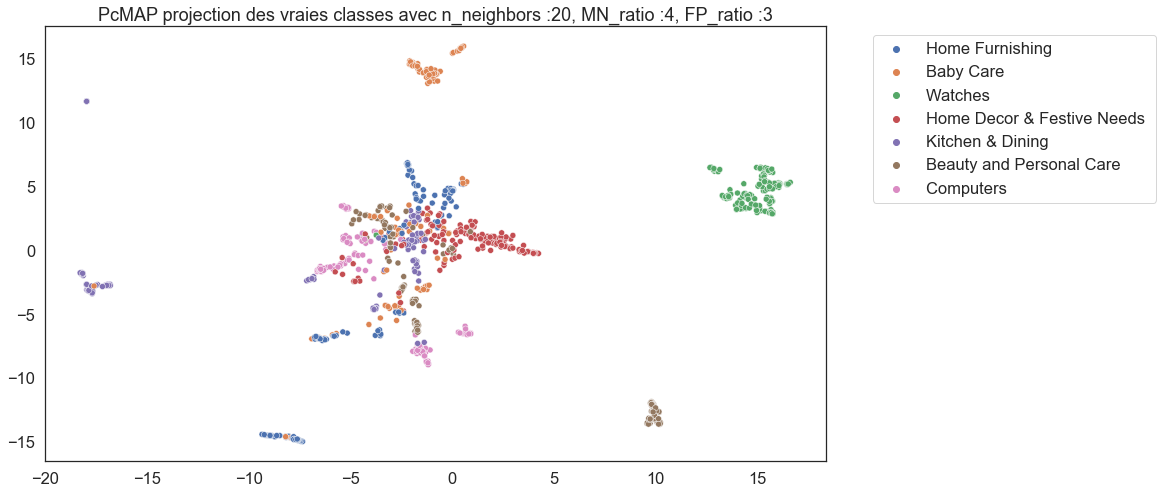

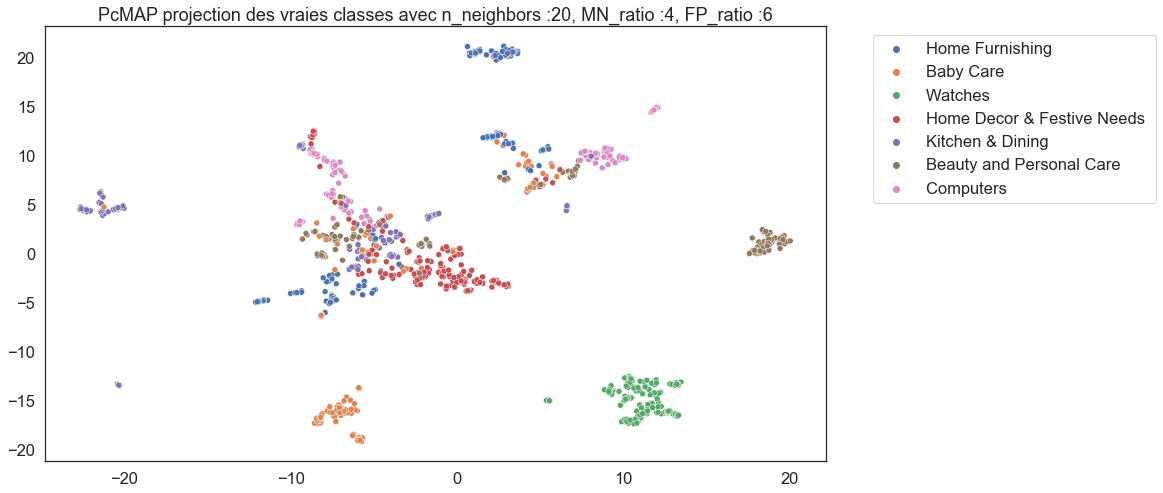

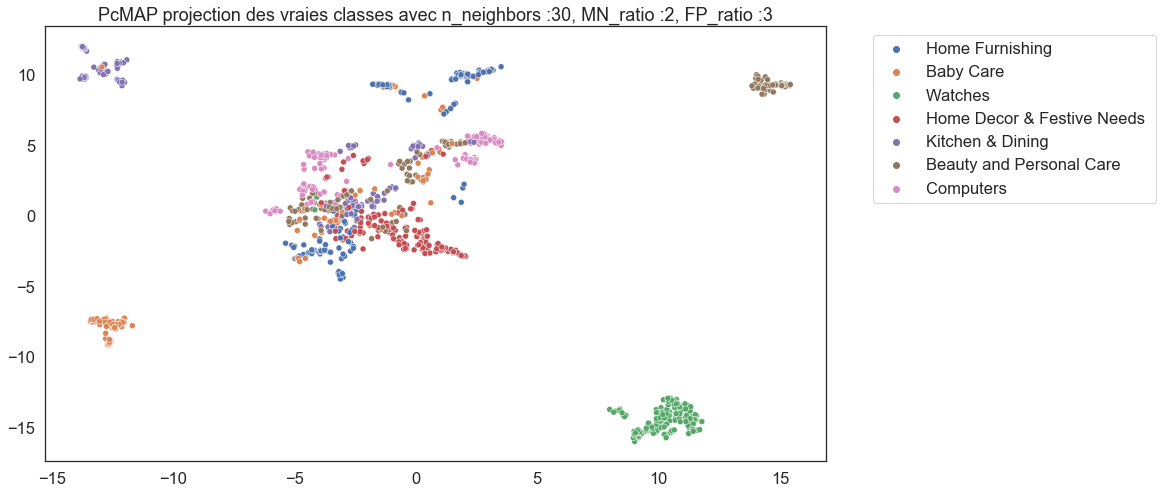

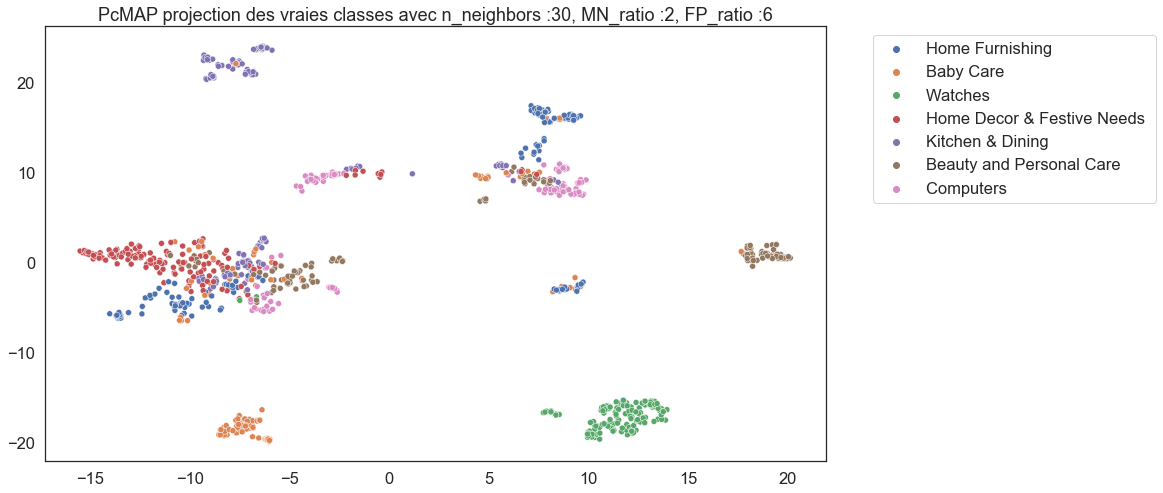

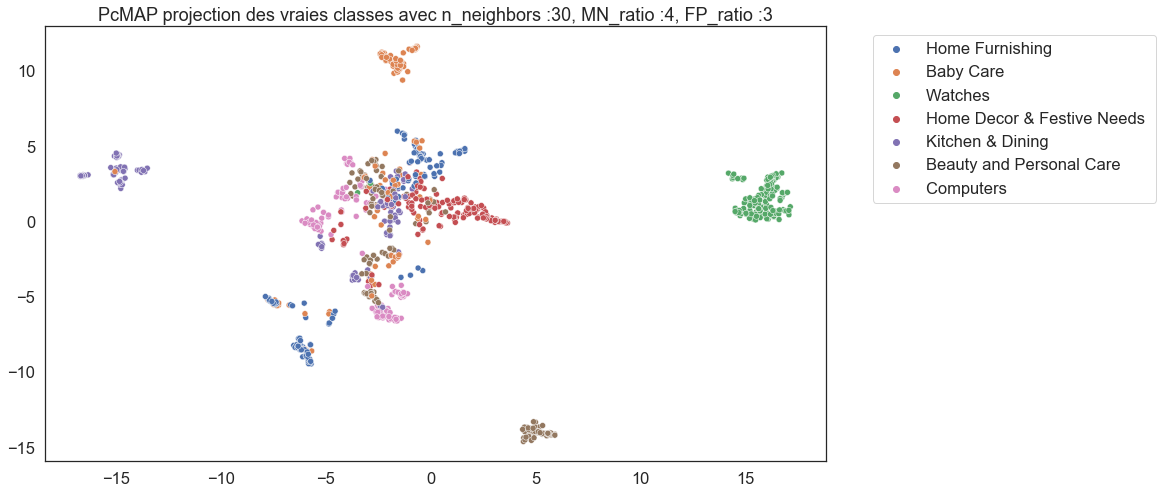

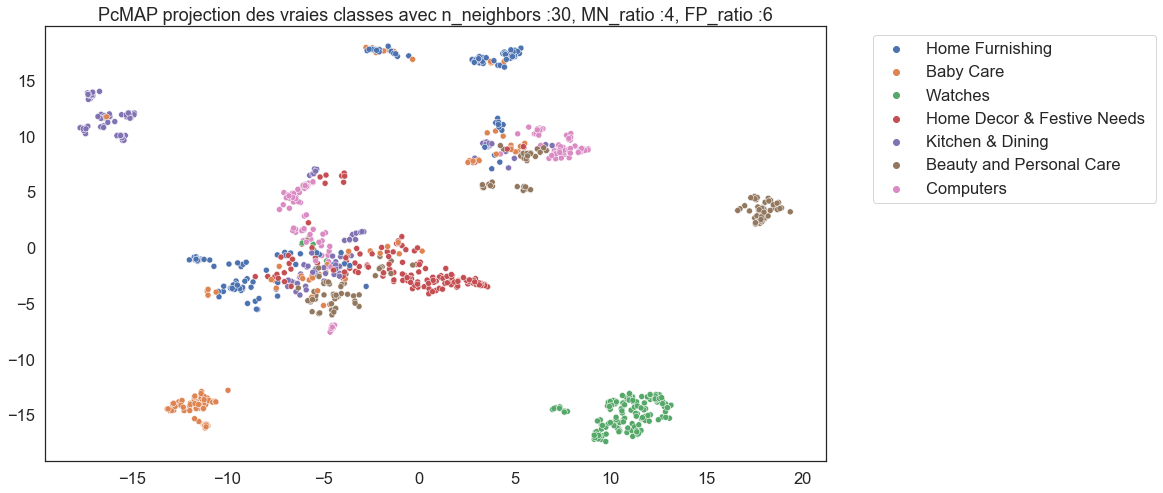

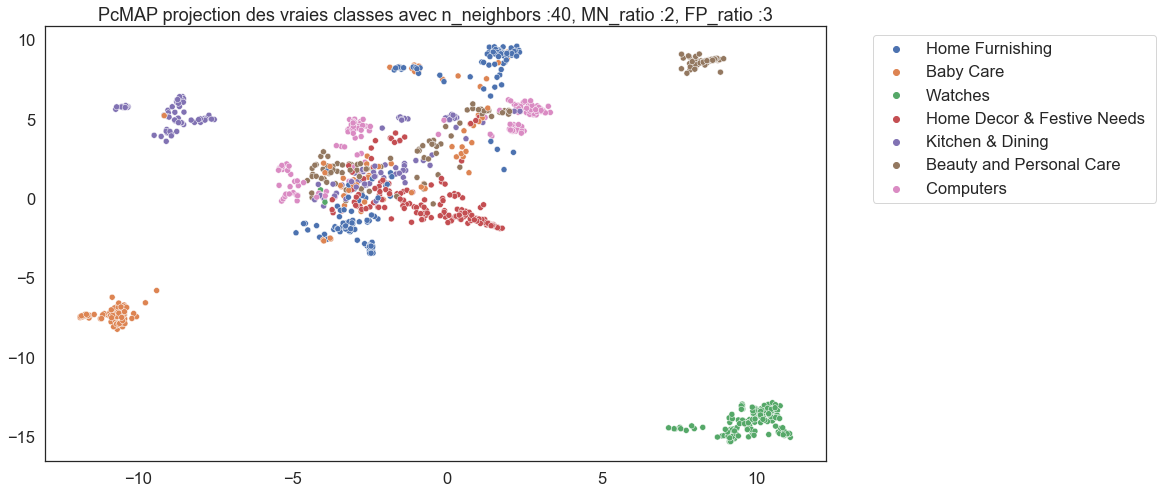

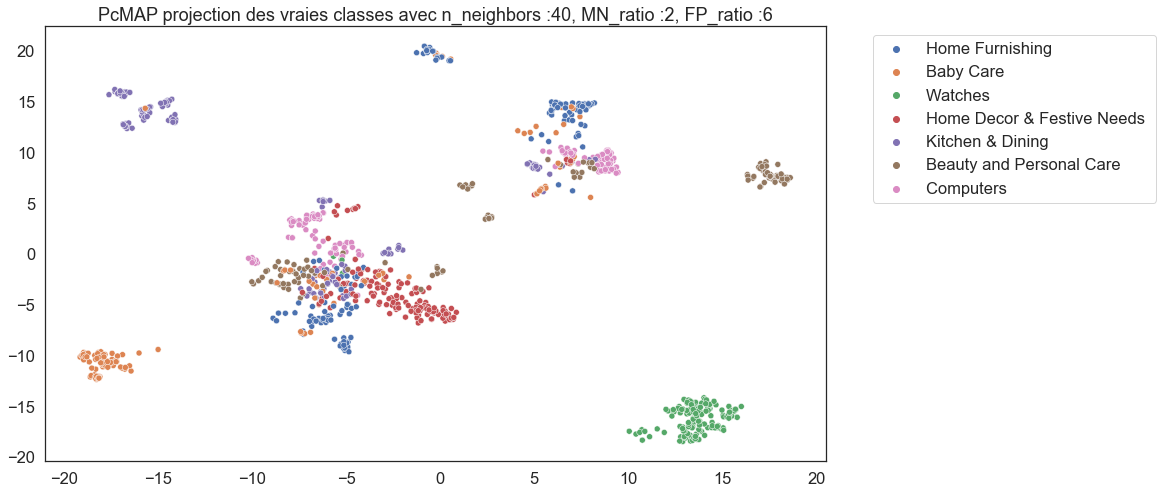

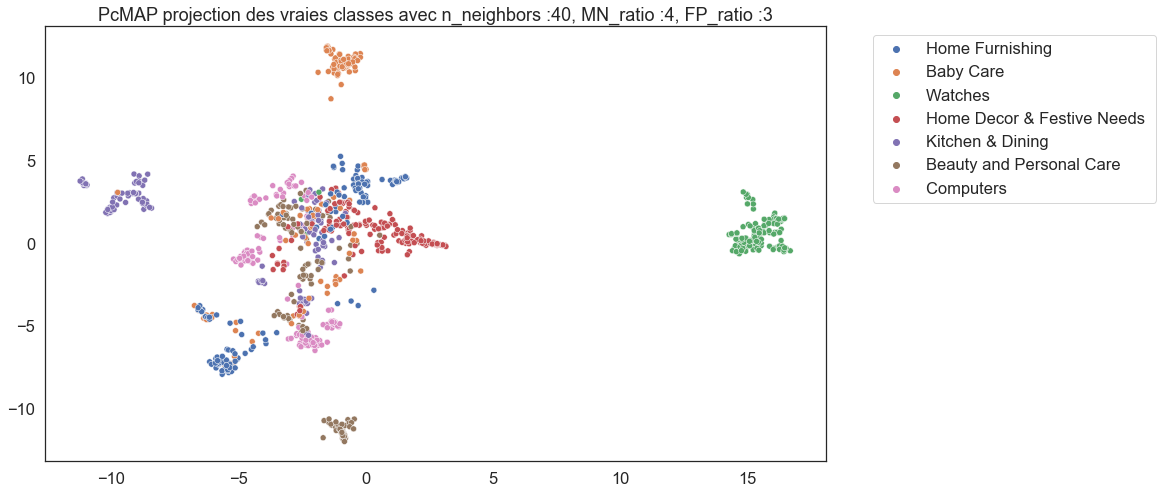

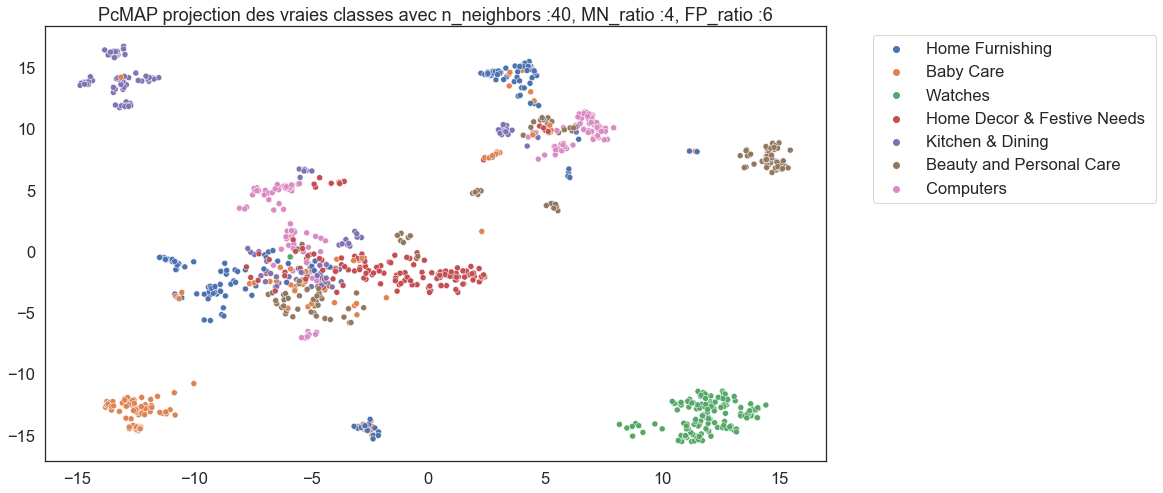

In [69]:
%%time

for n_neighbors in tqdm([20, 30, 40]):

    for MN_ratio in [2, 4]:

        for FP_ratio in [3, 6]:
            # initializing the pacmap instance
            # Setting n_neighbors to "None" leads to a default choice shown below in "parameter" section
            embedding = pacmap.PaCMAP(
                n_dims=2,
                n_neighbors=n_neighbors,
                MN_ratio=MN_ratio,
                FP_ratio=FP_ratio,
                apply_pca=True,
                random_state=42,
            )

            # fit the data (The index of transformed data corresponds to the index of the original data)
            X_transformed = embedding.fit_transform(features_combined_df, init="pca")

            # PcMAP projectin of data clusters
            sns.set(style="white", font_scale=1.5)

            fig, ax = plt.subplots(figsize=(14, 8))

            sns.scatterplot(
                data=X_transformed,
                x=X_transformed[:, 0],
                y=X_transformed[:, 1],
                hue=data["product_category_1"].values,
                ax=ax,
            )

            ax.set(
                title=f"PcMAP projection des vraies classes avec n_neighbors :{n_neighbors}, MN_ratio :{MN_ratio}, FP_ratio :{FP_ratio}"
            )
            ax.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")

            # Liberer la RAM
            gc.collect()
            gc.collect()

> avec n_neighbors=30, MN_ratio=2 et FP_ratio=3, nous pouvons distinguer clairement ** 4 classes parmi les 7 vraies classes**

*  **La meilleure projection des classes avec PcMAP**

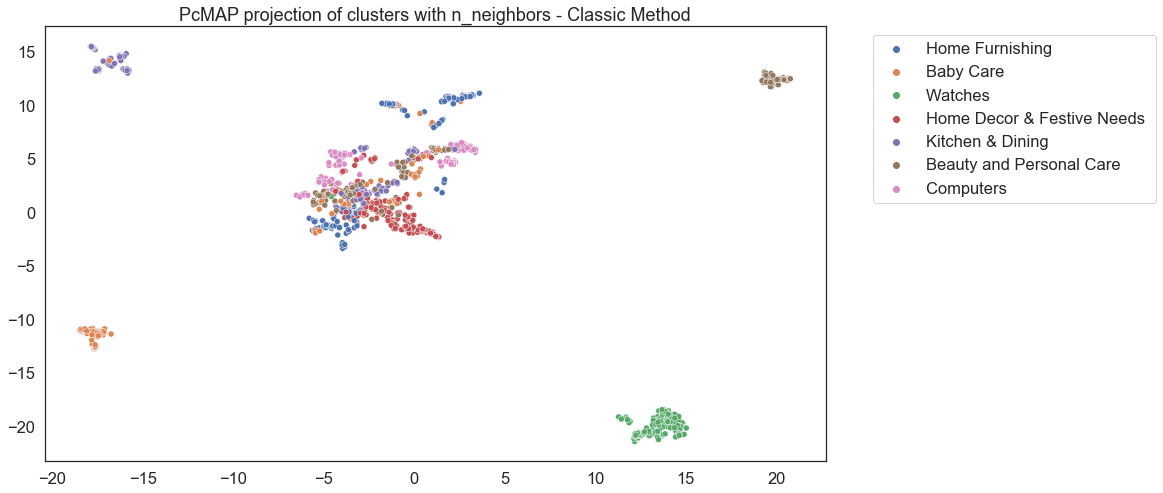

In [133]:
# initializing the pacmap instance
# Setting n_neighbors to "None" leads to a default choice shown below in "parameter" section
embedding = pacmap.PaCMAP(
    n_dims=2,
    n_neighbors=30,
    MN_ratio=2,
    FP_ratio=3,
    num_iters=900,
    apply_pca=True,
    random_state=42,
)

# fit the data (The index of transformed data corresponds to the index of the original data)
X_transformed = embedding.fit_transform(features_combined_df, init="pca")

# PcMAP projectin of data clusters
sns.set(style="white", font_scale=1.5)

fig, ax = plt.subplots(figsize=(14, 8))

sns.scatterplot(
    data=X_transformed,
    x=X_transformed[:, 0],
    y=X_transformed[:, 1],
    hue=data["product_category_1"].values,
    ax=ax,
)

ax.set(title=f"PcMAP projection of clusters with n_neighbors - Classic Method")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left");

### <font color=#f29966>Clustering avec K-Means</font>

In [134]:
from sklearn.cluster import KMeans

In [135]:
%%time
kmeans_cl = KMeans(
    n_clusters=7, init="k-means++", n_init=10, max_iter=300, random_state=0
).fit(X_transformed)

Wall time: 77 ms


In [136]:
data["clusters_classic_method_kmeans"] = kmeans_cl.fit_predict(X_transformed)

In [137]:
data[["product_category_1", "clusters_classic_method_kmeans"]].groupby(
    ["clusters_classic_method_kmeans"]
).describe(include="object").T

clusters_classic_method_kmeans           0         1  \
product_category_1 count               235       146   
                   unique                7         1   
                   top          Computers   Watches    
                   freq                 80       146   

clusters_classic_method_kmeans                          2           3  \
product_category_1 count                               62          82   
                   unique                               1           1   
                   top          Beauty and Personal Care   Baby Care    
                   freq                                62          82   

clusters_classic_method_kmeans                  4  \
product_category_1 count                       74   
                   unique                       2   
                   top          Kitchen & Dining    
                   freq                        73   

clusters_classic_method_kmeans                            5                 6  
product_category_1 count                                231               219  
                   unique                                 5                 6  
                   top          Home Decor & Festive Needs   Home Furnishing   
                   freq                                 127                78

### <font color=#f29966>Similarité entre les vraies classes et les clusters</font>

*  **PcMAP Projection des vraies classes vs les clusters**

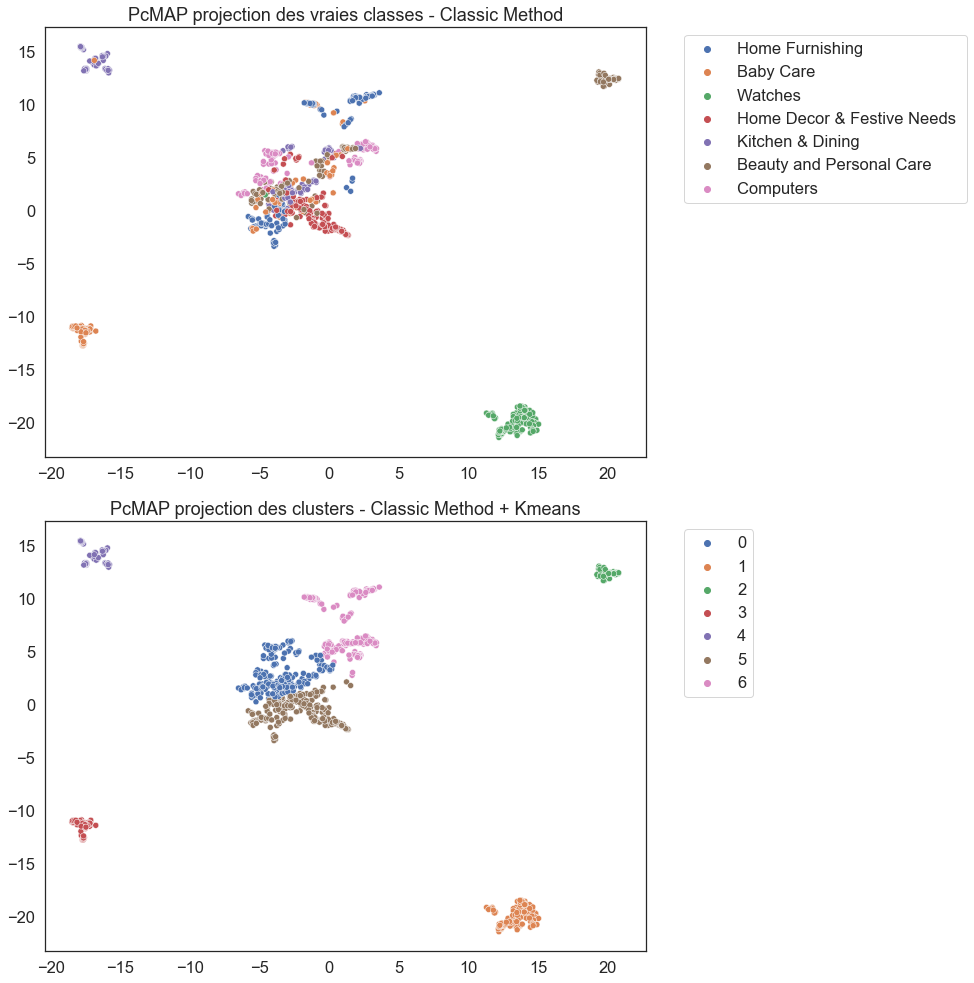

In [139]:
# PcMAP projectin of data clusters
sns.set(style="white", font_scale=1.5)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14, 14))

# PcMAP projectin of data clusters
sns.scatterplot(
    data=X_transformed,
    x=X_transformed[:, 0],
    y=X_transformed[:, 1],
    hue=data["product_category_1"].values,
    ax=ax[0],
    palette="deep",
)

ax[0].set(title="PcMAP projection des vraies classes - Classic Method")
ax[0].legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")


sns.scatterplot(
    data=X_transformed,
    x=X_transformed[:, 0],
    y=X_transformed[:, 1],
    hue=data["clusters_classic_method_kmeans"].values,
    ax=ax[1],
    palette="deep",
)

ax[1].set(title="PcMAP projection des clusters - Classic Method + Kmeans")
ax[1].legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")

fig.tight_layout()

In [140]:
from sklearn.metrics import (
    confusion_matrix,
    plot_confusion_matrix,
)
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder

In [141]:
label_encoder = LabelEncoder()

In [142]:
label_pred_kmeans = kmeans_cl.fit_predict(X_transformed)
label_true = label_encoder.fit_transform(data["product_category_1"])

*  **Rand Index des vraies classes vs les clusters**

In [162]:
np.random.seed(42)
ari_score_classic_method_kmeans = round(adjusted_rand_score(label_true, label_pred_kmeans) * 100, 2)
ari_score_classic_method_kmeans

37.4

*  **Matrice de confusion des vraies classes vs les clusters**

In [144]:
data[["product_category_1", "clusters_classic_method_kmeans"]].groupby(
    ["clusters_classic_method_kmeans"]
).describe(include="object").T

clusters_classic_method_kmeans           0         1  \
product_category_1 count               235       146   
                   unique                7         1   
                   top          Computers   Watches    
                   freq                 80       146   

clusters_classic_method_kmeans                          2           3  \
product_category_1 count                               62          82   
                   unique                               1           1   
                   top          Beauty and Personal Care   Baby Care    
                   freq                                62          82   

clusters_classic_method_kmeans                  4  \
product_category_1 count                       74   
                   unique                       2   
                   top          Kitchen & Dining    
                   freq                        73   

clusters_classic_method_kmeans                            5                 6  
product_category_1 count                                231               219  
                   unique                                 5                 6  
                   top          Home Decor & Festive Needs   Home Furnishing   
                   freq                                 127                78

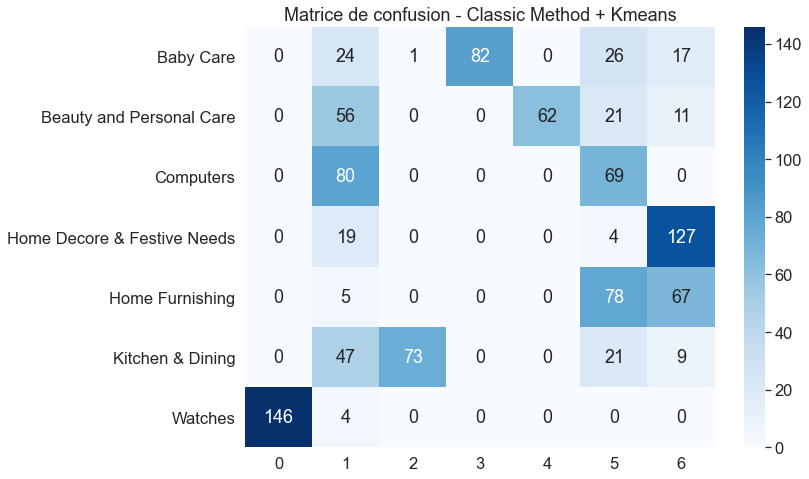

In [148]:
sns.set(style="white", font_scale=1.5)

fig, ax = plt.subplots(figsize=(12, 7))

sns.heatmap(
    confusion_matrix(label_true, label_pred_kmeans),
    annot=True,
    fmt="d",
    cmap="Blues",
    yticklabels=[
        "Baby Care",
        "Beauty and Personal Care",
        "Computers",
        "Home Decore & Festive Needs",
        "Home Furnishing",
        "Kitchen & Dining",
        "Watches",
    ],
    ax=ax,
)

ax.set(title="Matrice de confusion - Classic Method + Kmeans")

fig.tight_layout()

### <font color=#f29966>Clustering avec NMF</font>

In [146]:
from sklearn.decomposition import NMF

In [147]:
%%time
# Run NMF
nmf = NMF(n_components=7, random_state=42)

Wall time: 0 ns


*  **Entrainer NMF sur les feautres**

In [149]:
%%time
nmf.fit(features_combined_df)

Wall time: 1.02 s


NMF(n_components=7, random_state=42)

*  **Extraire les clusters identifiés par NMF**

In [ ]:
# Get the top predicted topic
predicted_topics = [np.argsort(each)[::-1][0] for each in nmf_trafo]

# Add to the df
data["clusters_classic_method_nmf"] = predicted_topics

*  **Extraire les topiques principaux**

In [150]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [151]:
no_top_words = 10
display_topics(nmf, vectorizer.get_feature_names(), no_top_words)

Topic 0:
guarantee replacement day cash genuine ship delivery buy free product
Topic 1:
watch analog men discount india woman great sonata online dial
Topic 2:
mug ceramic coffee perfect printland gift prithish one love get
Topic 3:
baby girl detail fabric cotton dress boy sleeve neck print
Topic 4:
cm showpiece cover inch design pack warranty color cushion model
Topic 5:
abstract blanket single double cash genuine ship delivery quilt buy
Topic 6:
rockmantra ceramic mug thrill permanent porcelain stay start pick yet


### <font color=#f29966>Similarité entre les vraies classes et les clusters</font>

*  **Visualiser les topiques principaux identifiés par NMF avec PcMAP**

In [155]:
nmf_trafo = nmf.transform(features_combined_df)

Wall time: 28 s


0

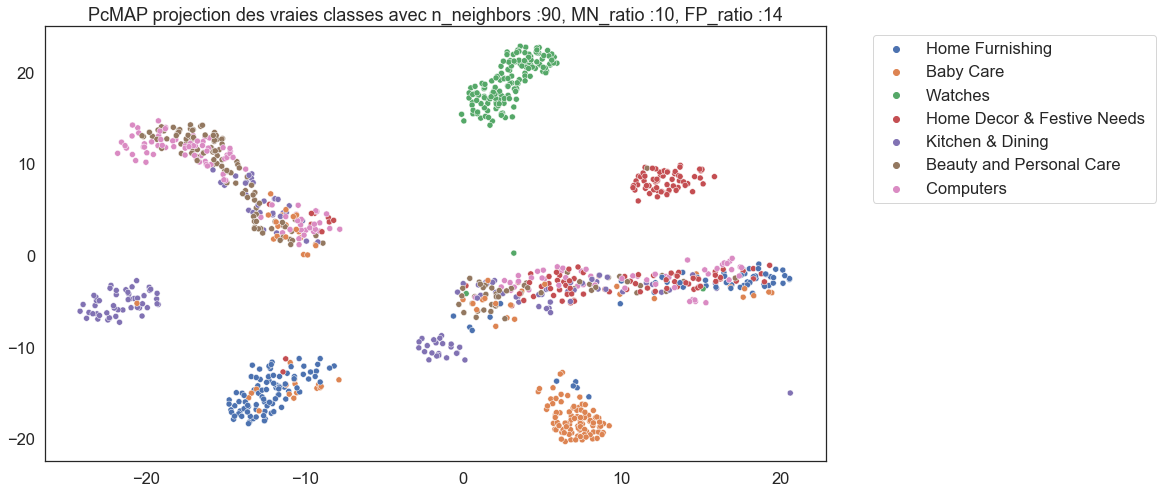

In [156]:
%%time

embedding_nmf = pacmap.PaCMAP(
    n_dims=2,
    n_neighbors=90,
    MN_ratio=10,
    FP_ratio=14,
    apply_pca=True,
    random_state=42,
)

# fit the data (The index of transformed data corresponds to the index of the original data)
X_transformed_nmf = embedding_nmf.fit_transform(nmf_trafo, init="pca")

# PcMAP projectin of data clusters
sns.set(style="white", font_scale=1.5)

fig, ax = plt.subplots(figsize=(14, 8))

sns.scatterplot(
    data=X_transformed_nmf,
    x=X_transformed_nmf[:, 0],
    y=X_transformed_nmf[:, 1],
    hue=data["product_category_1"].values,
    ax=ax,
)

ax.set(
    title=f"PcMAP projection des vraies classes avec n_neighbors :{n_neighbors}, MN_ratio :{MN_ratio}, FP_ratio :{FP_ratio}"
)
ax.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")

# Liberer la RAM
gc.collect()
gc.collect()

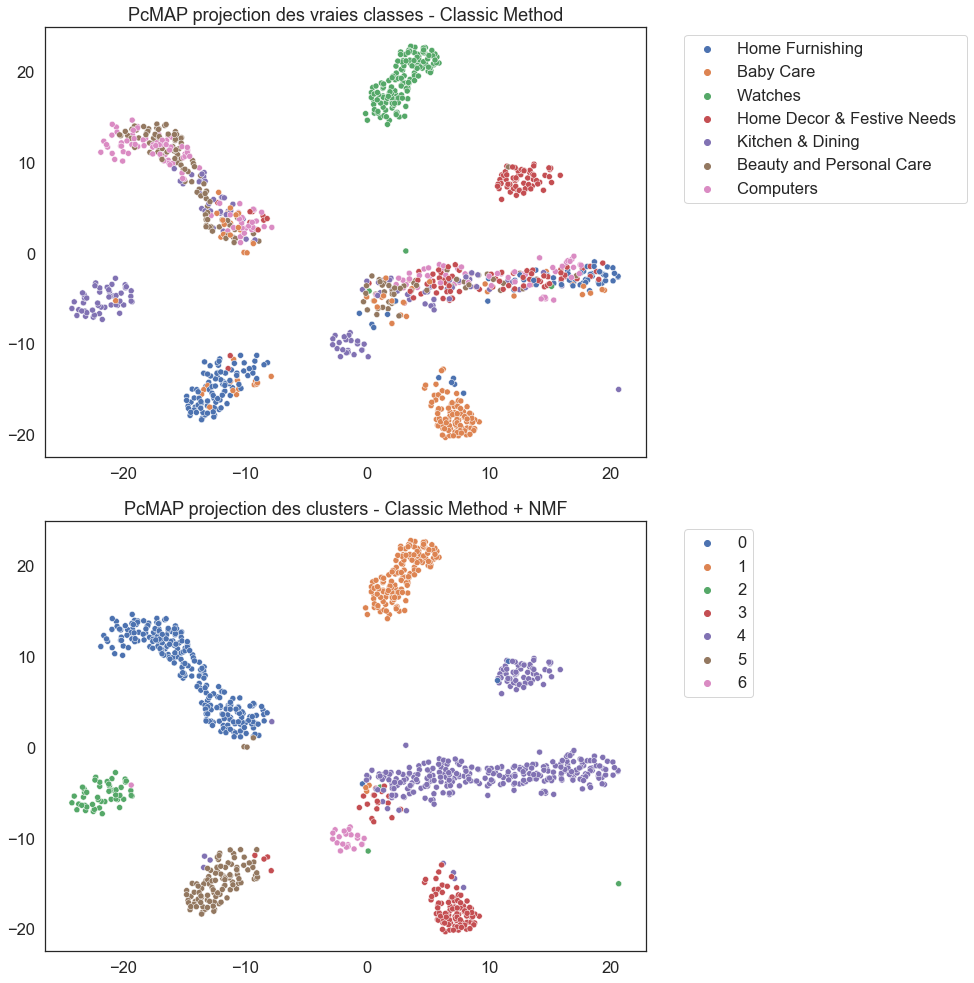

In [161]:
# PcMAP projectin of data clusters
sns.set(style="white", font_scale=1.5)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14, 14))

# PcMAP projectin of data clusters
sns.scatterplot(
    data=X_transformed_nmf,
    x=X_transformed_nmf[:, 0],
    y=X_transformed_nmf[:, 1],
    hue=data["product_category_1"].values,
    ax=ax[0],
    palette="deep",
)

ax[0].set(title="PcMAP projection des vraies classes - Classic Method")
ax[0].legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")


sns.scatterplot(
    data=X_transformed_nmf,
    x=X_transformed_nmf[:, 0],
    y=X_transformed_nmf[:, 1],
    hue=data["clusters_classic_method_nmf"].values,
    ax=ax[1],
    palette="deep",
)

ax[1].set(title="PcMAP projection des clusters - Classic Method + NMF")
ax[1].legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")

fig.tight_layout()

*  **Rand Index des vraies classes vs les clusters**

In [163]:
np.random.seed(42)
ari_score_classic_method_nmf = round(adjusted_rand_score(label_true, predicted_topics) * 100, 2)
ari_score_classic_method_nmf

34.81

*  **Matrice de confusion des vraies classes vs les clusters**

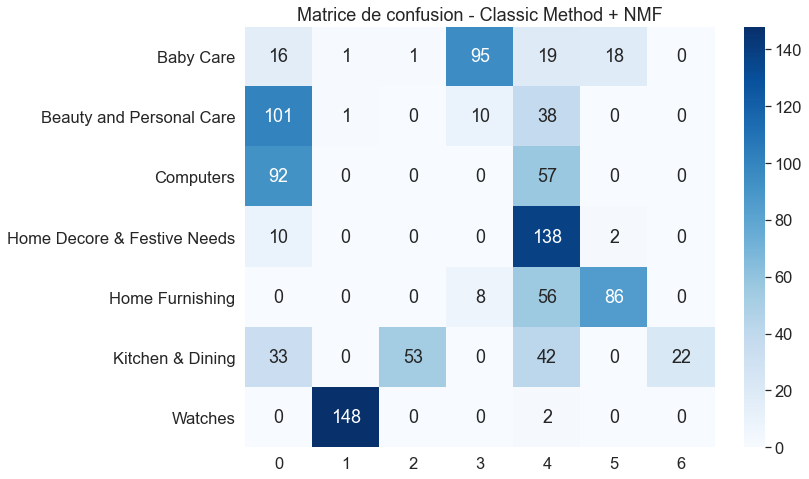

In [165]:
data[["product_category_1", "clusters_classic_method_nmf"]].groupby(
    ["clusters_classic_method_nmf"]
).describe(include="object").T


sns.set(style="white", font_scale=1.5)

fig, ax = plt.subplots(figsize=(12, 7))

sns.heatmap(
    confusion_matrix(label_true, predicted_topics),
    annot=True,
    fmt="d",
    cmap="Blues",
    yticklabels=[
        "Baby Care",
        "Beauty and Personal Care",
        "Computers",
        "Home Decore & Festive Needs",
        "Home Furnishing",
        "Kitchen & Dining",
        "Watches",
    ],
    ax=ax,
)

ax.set(title="Matrice de confusion - Classic Method + NMF")

fig.tight_layout()

## <font color=#f2790f> Clustering Kmeans vs NMF</font>

*  **Comparaison du Rand Index**

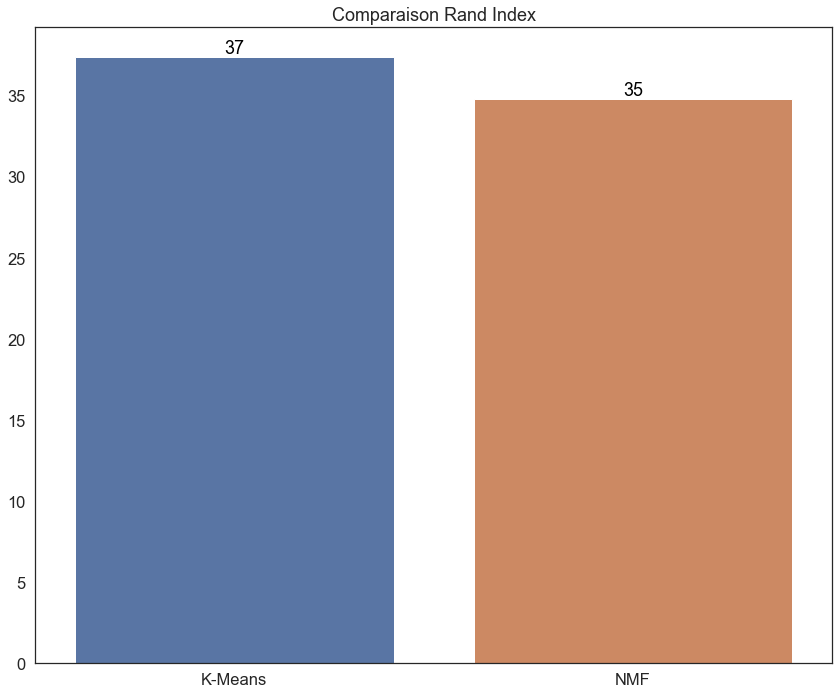

In [166]:
# PcMAP projectin des vraies classes
sns.set(style="white", font_scale=1.5)

fig, ax = plt.subplots(figsize=(12, 10))

sns.barplot(
    x=["K-Means", "NMF"],
    y=[ari_score_classic_method_kmeans, ari_score_classic_method_nmf],
    ax=ax,
)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
    

ax.set(title="Comparaison Rand Index")
fig.tight_layout()

> Dans la suite du notebook, nous allons retenir les résultats de K-Means

<img src='https://scontent.fcdg2-1.fna.fbcdn.net/v/t1.6435-9/154196282_3653559314697389_4174523554590546826_n.jpg?_nc_cat=111&ccb=1-5&_nc_sid=973b4a&_nc_ohc=H_ViRY_Bnu0AX9J5T4F&_nc_ht=scontent.fcdg2-1.fna&oh=9c1e05e851f669bdf5f9077e7b411367&oe=61B85286' width=60px align="right"/> 
<div style="vertical-align: left">
    <h1>
    <font color=#f26430 >Chapitre 3 : Méthode Deep Learning (Transfer learning)
        </font>
    </h1>
</div>

## <font color=#f2790f> Extraction de features des données textulles</font>

In [87]:
from sentence_transformers import SentenceTransformer

*  **Initialisation de SentenceTransformer avec le modèle pré-entrainé : `all-MiniLM-L6-v6`**

In [88]:
model_sbert = SentenceTransformer("all-MiniLM-L6-v2")  # all-mpnet-base-v2')

*  **Extraction de features**

In [89]:
%%time
# Exrtract text features using SBERT
sbert_features = model_sbert.encode(data["description"], show_progress_bar=True)

Batches:   0%|          | 0/33 [00:00<?, ?it/s]

Wall time: 1min 29s


In [90]:
sbert_features.shape

(1049, 384)

## <font color=#f2790f> Extraction de features des images</font>

In [91]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.layers import merge, Input

*  **Initialisation de VGG16 avec le modèle pré-entrainé avec les données de `imagenet`**

In [92]:
model_vgg16 = VGG16(
    weights="imagenet", include_top=False, input_shape=(240, 240, 3)
)  # input_shape=(240, 240, 3))

model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 240, 240, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 240, 240, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 120, 120, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 120, 120, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 120, 120, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 60, 60, 128)       0     

*  **Extraction de features**

In [93]:
%%time

np.random.seed(20)

vgg16_features = []

for image_path in tqdm(images_path):
    img = image.load_img(image_path, target_size=(240, 240))
    img_data = image.img_to_array(img)  # Converts image to a Numpy array
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)  # images are converted from RGB to BGR

    vgg16_feature = model_vgg16.predict(img_data)
    vgg16_feature_np = np.array(vgg16_feature)
    vgg16_features.append(vgg16_feature_np.flatten())

  0%|          | 0/1049 [00:00<?, ?it/s]

C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:2855: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Wall time: 9min 7s


In [94]:
vgg16_features = np.array(vgg16_features)

In [95]:
vgg16_features.shape, sbert_features.shape

((1049, 25088), (1049, 384))

## <font color=#f2790f> Réduction de dimensions avec PcMAP</font>

*  **Concatenation des feautres**

In [96]:
features_combined_dp = np.concatenate((sbert_features, vgg16_features), axis=1)

*  **Projection des vraies classes avec PcMAP**

  0%|          | 0/2 [00:00<?, ?it/s]

Wall time: 54.7 s


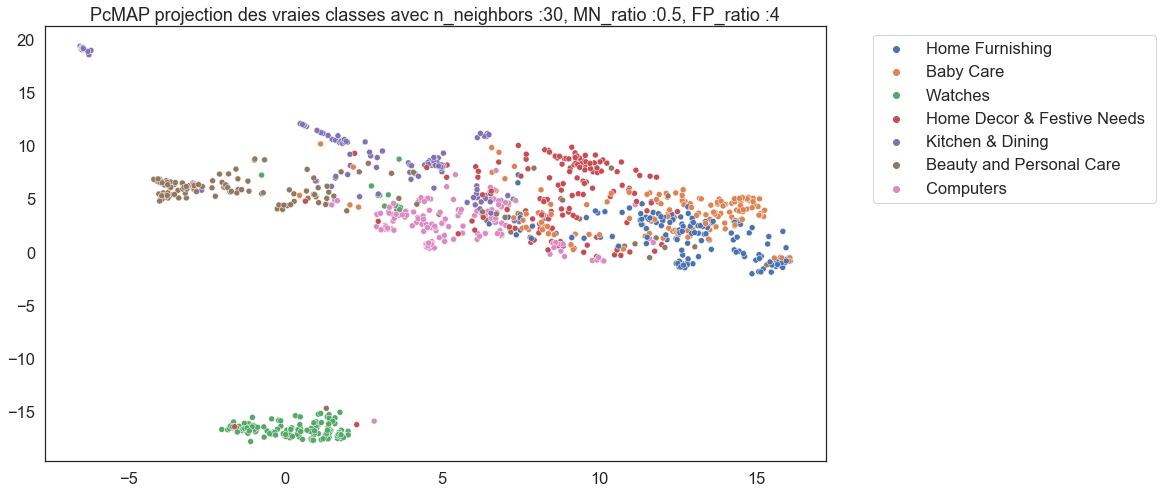

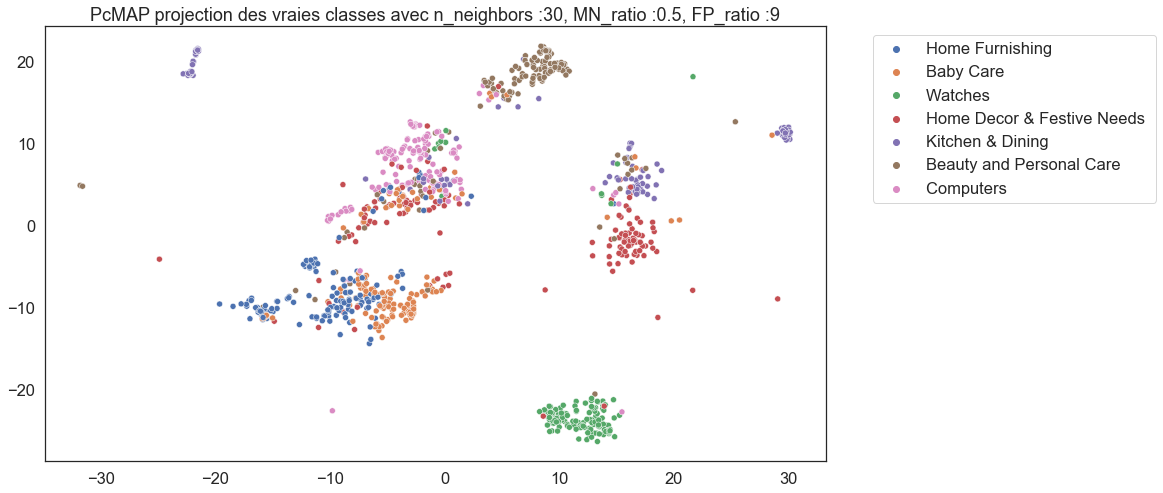

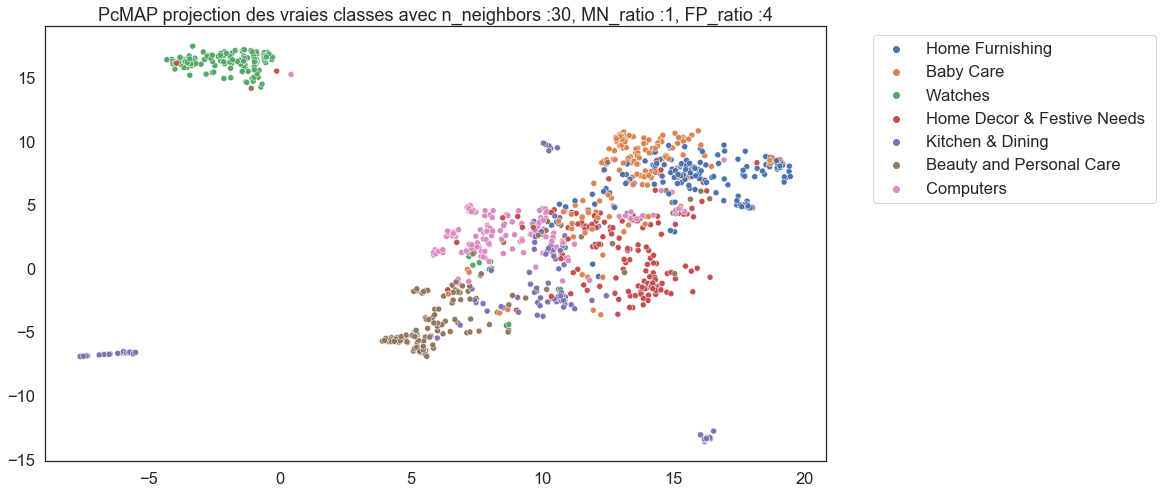

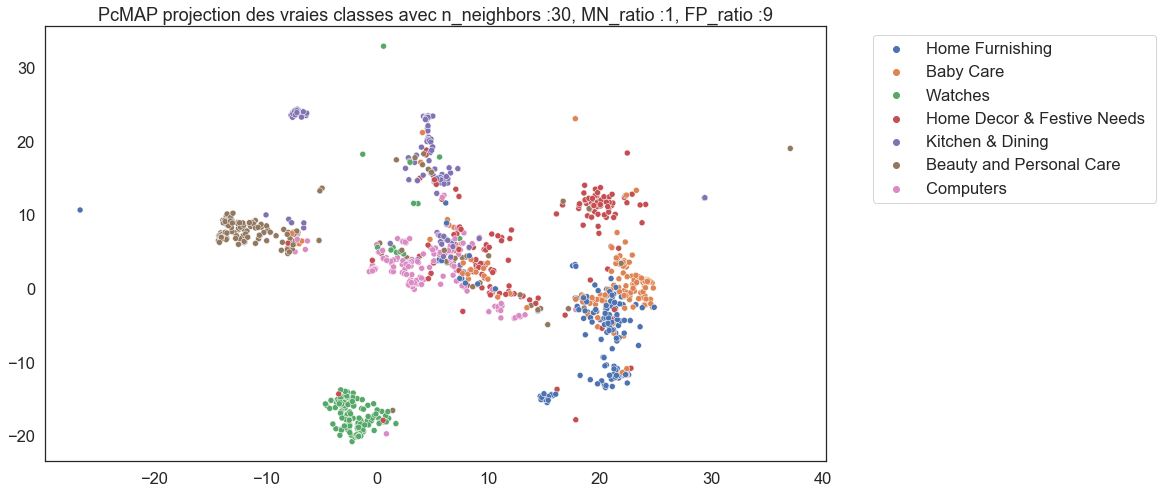

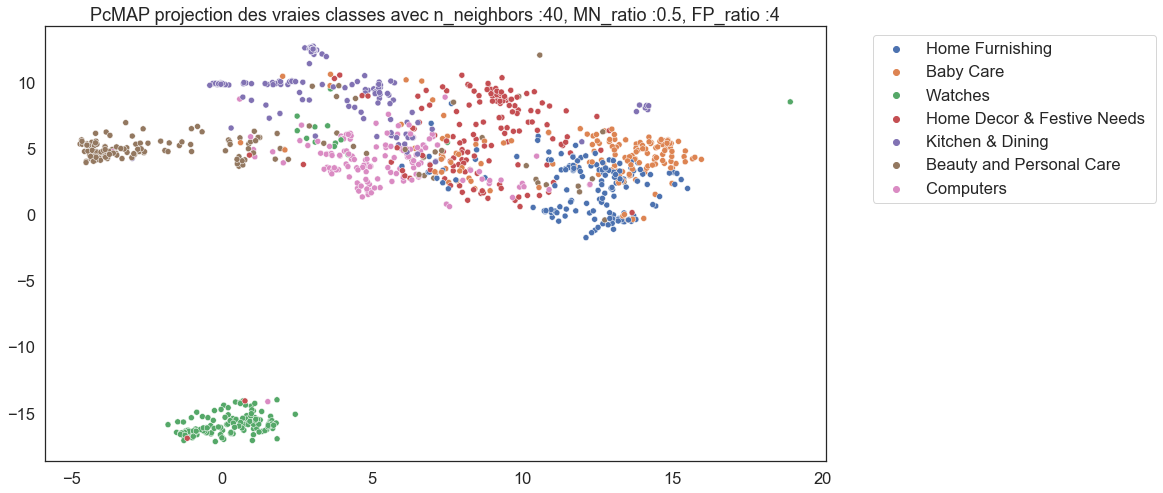

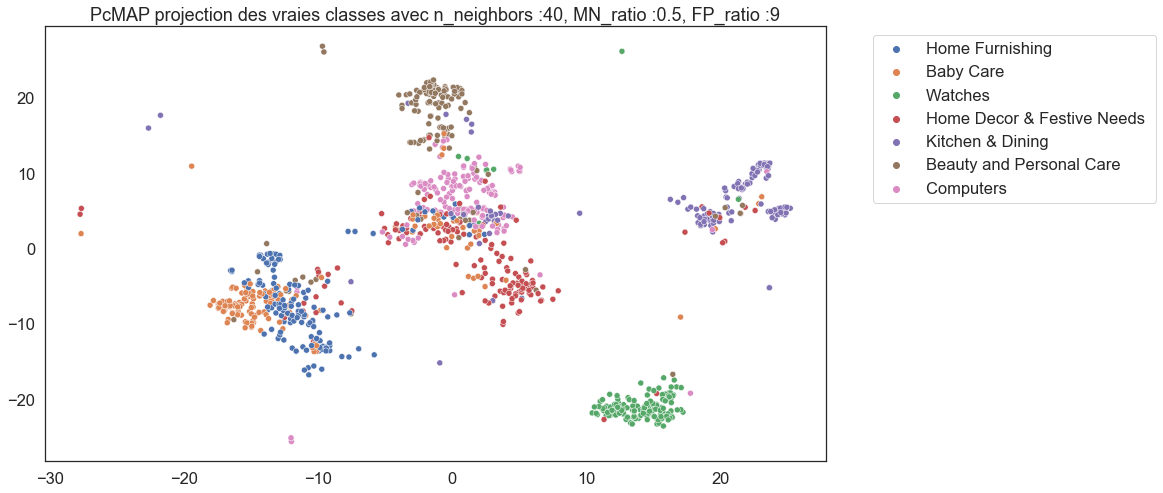

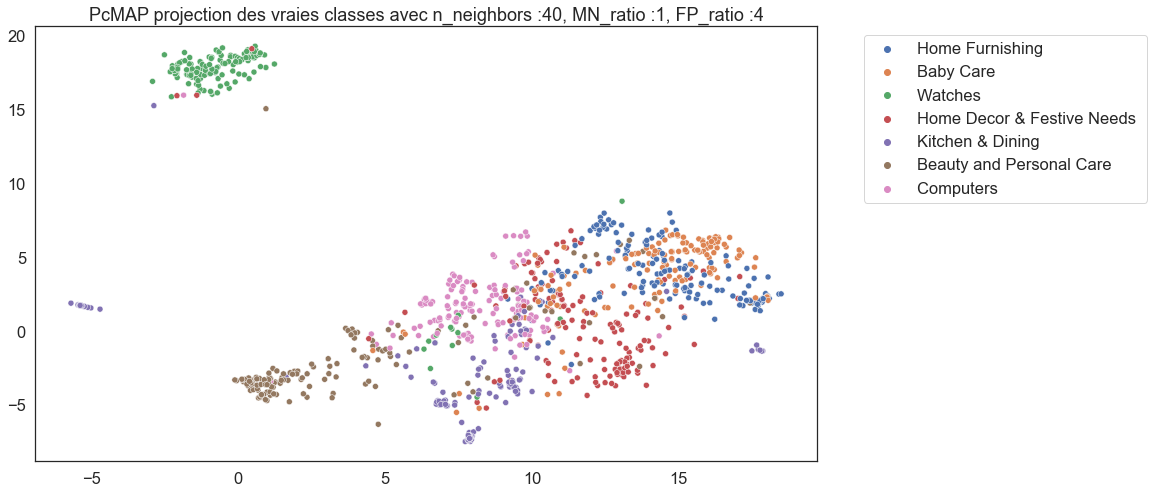

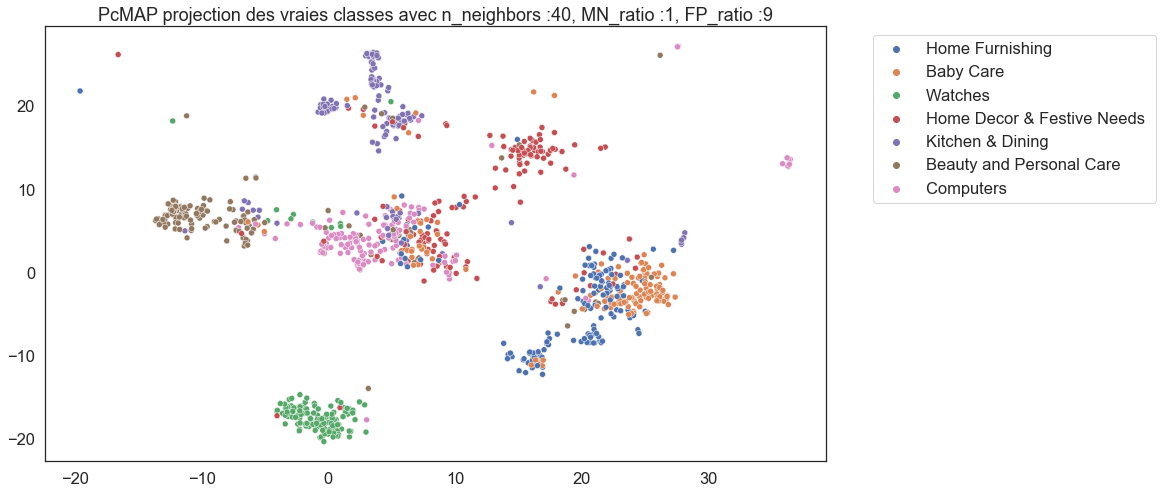

In [97]:
%%time

for n_neighbors in tqdm([30, 40]):

    for MN_ratio in [0.5, 1]:

        for FP_ratio in [4, 9]:
            # initializing the pacmap instance
            # Setting n_neighbors to "None" leads to a default choice shown below in "parameter" section
            embedding_dp = pacmap.PaCMAP(
                n_dims=2,
                n_neighbors=n_neighbors,
                MN_ratio=MN_ratio,
                FP_ratio=FP_ratio,
                apply_pca=True,
                random_state=42,
            )

            # fit the data (The index of transformed data corresponds to the index of the original data)
            X_transformed_dp = embedding_dp.fit_transform(
                features_combined_dp, init="pca"
            )

            # PcMAP projectin of data clusters
            sns.set(style="white", font_scale=1.5)

            fig, ax = plt.subplots(figsize=(14, 8))

            sns.scatterplot(
                data=X_transformed_dp,
                x=X_transformed_dp[:, 0],
                y=X_transformed_dp[:, 1],
                hue=data["product_category_1"].values,
                ax=ax,
            )

            ax.set(
                title=f"PcMAP projection des vraies classes avec n_neighbors :{n_neighbors}, MN_ratio :{MN_ratio}, FP_ratio :{FP_ratio}"
            )
            ax.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")

            # Liberer la RAM
            gc.collect()
            gc.collect()

> avec n_neighbors=40, MN_ratio=1 et FP_ratio=9, nous pouvons distinguer clairement ** 4 classes parmi les 7 vraies classes**

*  **Projection des vraies classes avec PcMAP**

Wall time: 8.64 s


0

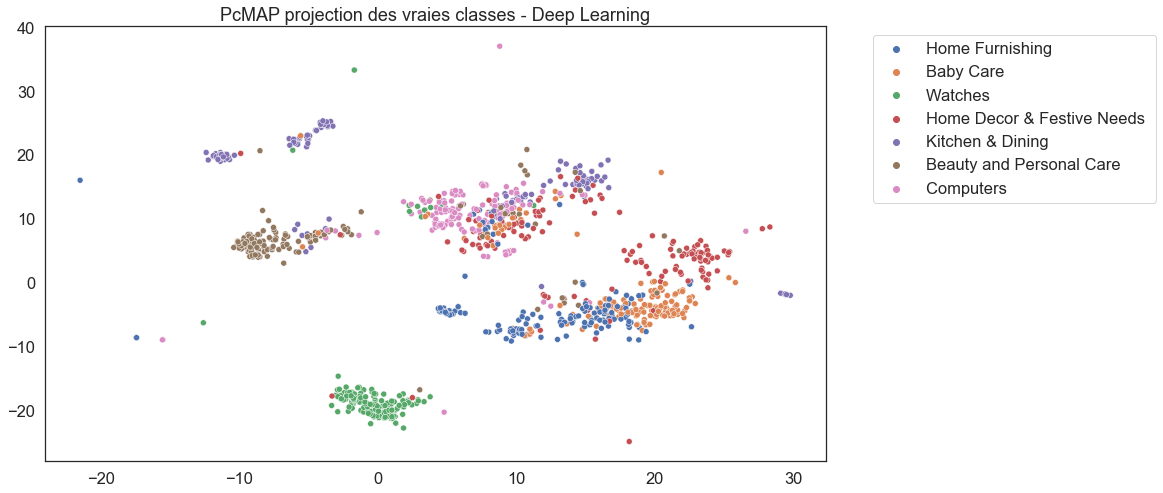

In [98]:
%%time
embedding_dp = pacmap.PaCMAP(n_dims=2, n_neighbors=40, MN_ratio=1, FP_ratio=9)

# fit the data (The index of transformed data corresponds to the index of the original data)
X_transformed_dp = embedding_dp.fit_transform(features_combined_dp, init="pca")

# PcMAP projectin of data clusters
sns.set(style="white", font_scale=1.5)

fig, ax = plt.subplots(figsize=(14, 8))

sns.scatterplot(
    data=X_transformed_dp,
    x=X_transformed_dp[:, 0],
    y=X_transformed_dp[:, 1],
    hue=data["product_category_1"].values,
    ax=ax,
)
ax.set(title=f"PcMAP projection des vraies classes - Deep Learning")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")

# Liberer la RAM
gc.collect()
gc.collect()

## <font color=#f2790f> Clustering des features </font>

In [99]:
%%time
kmeans_dp = KMeans(
    n_clusters=7, init="k-means++", n_init=10, max_iter=300, random_state=0
).fit(X_transformed_dp)

Wall time: 126 ms


*  **Calcul des clusters**

In [100]:
label_pred_dp = kmeans_dp.predict(X_transformed_dp)
data["clusters_dp"] = label_pred_dp

## <font color=#f2790f> Similarité entre les vraies classes et les clusters</font>

*  **PcMAP Projection des vraies classes vs les clusters**

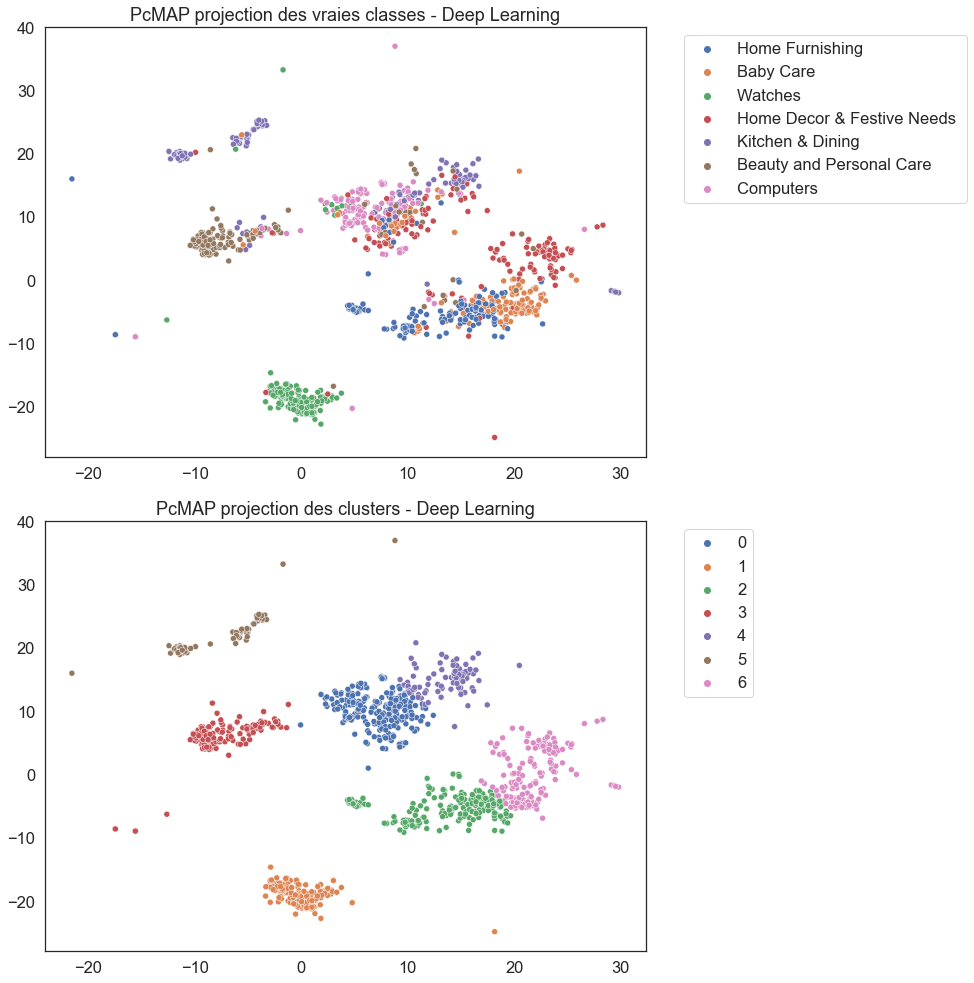

In [101]:
# PcMAP projectin of data clusters
sns.set(style="white", font_scale=1.5)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14, 14))

# PcMAP projectin of data clusters
sns.scatterplot(
    data=X_transformed_dp,
    x=X_transformed_dp[:, 0],
    y=X_transformed_dp[:, 1],
    hue=data["product_category_1"].values,
    ax=ax[0],
    palette="deep",
)

ax[0].set(title="PcMAP projection des vraies classes - Deep Learning")
ax[0].legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")


sns.scatterplot(
    data=X_transformed_dp,
    x=X_transformed_dp[:, 0],
    y=X_transformed_dp[:, 1],
    hue=label_pred_dp,
    ax=ax[1],
    palette="deep",
)

ax[1].set(title="PcMAP projection des clusters - Deep Learning")
ax[1].legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")

fig.tight_layout()

*  **Rand Index des vraies classes vs les clusters**

In [102]:
np.random.seed(42)

ari_score_dp = round(adjusted_rand_score(label_true, label_pred_dp) * 100, 2)
ari_score_dp

44.38

In [104]:
data[["product_category_1", "clusters_dp"]].groupby(["clusters_dp"]).describe(
    include="object"
).T

clusters_dp                         0         1                 2  \
product_category_1 count          237       143               198   
                   unique           7         4                 6   
                   top     Computers   Watches   Home Furnishing    
                   freq           123       138               127   

clusters_dp                                        3                  4  \
product_category_1 count                         137                 87   
                   unique                          7                  7   
                   top     Beauty and Personal Care   Kitchen & Dining    
                   freq                          115                 46   

clusters_dp                                5           6  
product_category_1 count                  84         163  
                   unique                  7           6  
                   top     Kitchen & Dining   Baby Care   
                   freq                   76          73

In [105]:
# for i in range(7):
#     print(f"cluster n° {i}")
#     print(data.loc[data["clusters_dp"] == i,["product_category_1"]].value_counts())
#     print("-" * 80)

*  **Matrice de confusion des vraies classes vs les clusters**

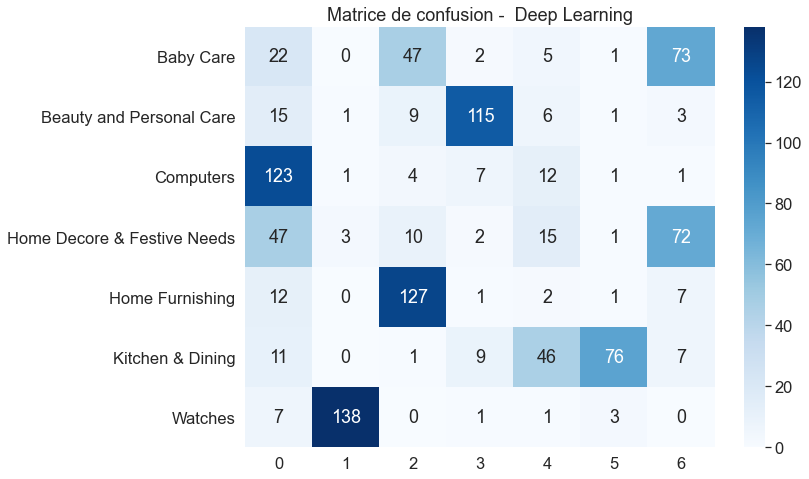

In [106]:
sns.set(style="white", font_scale=1.5)

fig, ax = plt.subplots(figsize=(12, 7))

sns.heatmap(
    confusion_matrix(label_true, label_pred_dp),
    annot=True,
    fmt="d",
    cmap="Blues",
    yticklabels=[
        "Baby Care",
        "Beauty and Personal Care",
        "Computers",
        "Home Decore & Festive Needs",
        "Home Furnishing",
        "Kitchen & Dining",
        "Watches",
    ],
    ax=ax,
)

ax.set(title="Matrice de confusion -  Deep Learning")


fig.tight_layout()

<img src='https://scontent.fcdg2-1.fna.fbcdn.net/v/t1.6435-9/154196282_3653559314697389_4174523554590546826_n.jpg?_nc_cat=111&ccb=1-5&_nc_sid=973b4a&_nc_ohc=H_ViRY_Bnu0AX9J5T4F&_nc_ht=scontent.fcdg2-1.fna&oh=9c1e05e851f669bdf5f9077e7b411367&oe=61B85286' width=60px align="right"/> 
<div style="vertical-align: left">
    <h1>
    <font color=#f26430 >Chapitre 4 : Méthode classique vs  Deep Learning (Transfer learning)
        </font>
    </h1>
</div>

## <font color=#f2790f> Comparaison des projections en 2D</font>

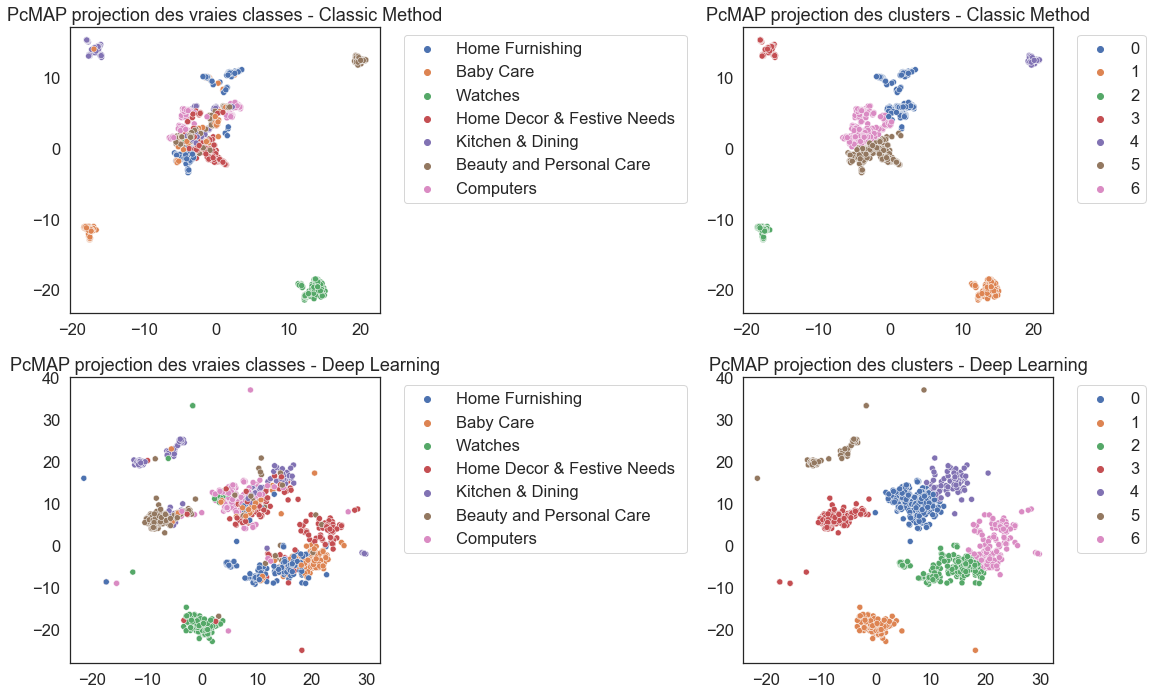

In [107]:
# ================================================Classic Method========================================================#
# PcMAP projectin des vraies classes
sns.set(style="white", font_scale=1.5)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

# PcMAP projectin of data clusters
sns.scatterplot(
    data=X_transformed,
    x=X_transformed[:, 0],
    y=X_transformed[:, 1],
    hue=data["product_category_1"].values,
    ax=ax[0, 0],
    palette="deep",
)

ax[0, 0].set(title="PcMAP projection des vraies classes - Classic Method")
ax[0, 0].legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")

# PcMAP projectin des clusters
sns.scatterplot(
    data=X_transformed,
    x=X_transformed[:, 0],
    y=X_transformed[:, 1],
    hue=data["clusters_classic_method"].values,
    ax=ax[0, 1],
    palette="deep",
)

ax[0, 1].set(title="PcMAP projection des clusters - Classic Method")
ax[0, 1].legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")

fig.tight_layout()

# ================================================Deep Learning Method========================================================#
# PcMAP projectin des vraies classes
sns.scatterplot(
    data=X_transformed_dp,
    x=X_transformed_dp[:, 0],
    y=X_transformed_dp[:, 1],
    hue=data["product_category_1"].values,
    ax=ax[1, 0],
    palette="deep",
)

ax[1, 0].set(title="PcMAP projection des vraies classes - Deep Learning")
ax[1, 0].legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")

# PcMAP projectin des clusters
sns.scatterplot(
    data=X_transformed_dp,
    x=X_transformed_dp[:, 0],
    y=X_transformed_dp[:, 1],
    hue=label_pred_dp,
    ax=ax[1, 1],
    palette="deep",
)

ax[1, 1].set(title="PcMAP projection des clusters - Deep Learning")
ax[1, 1].legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")

fig.tight_layout()

## <font color=#f2790f> Comparaison du Rand Index</font>

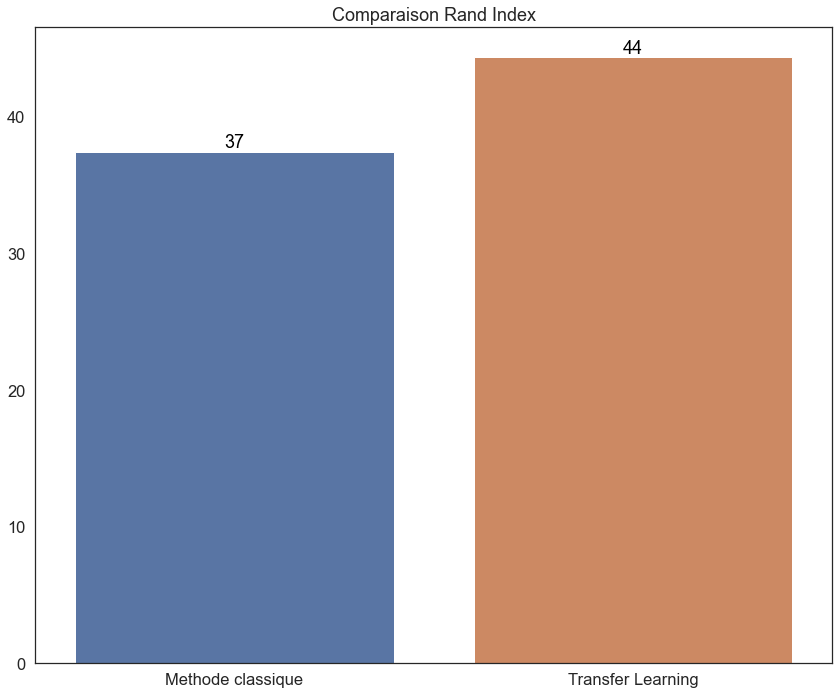

In [108]:
# PcMAP projectin des vraies classes
sns.set(style="white", font_scale=1.5)

fig, ax = plt.subplots(figsize=(12, 10))

sns.barplot(
    x=["Methode classique", "Transfer Learning"],
    y=[ari_score_classic_method, ari_score_dp],
    ax=ax,
)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
    

ax.set(title="Comparaison Rand Index")
fig.tight_layout()

## <font color=#f2790f> Comparaison des matrice de confusion</font>

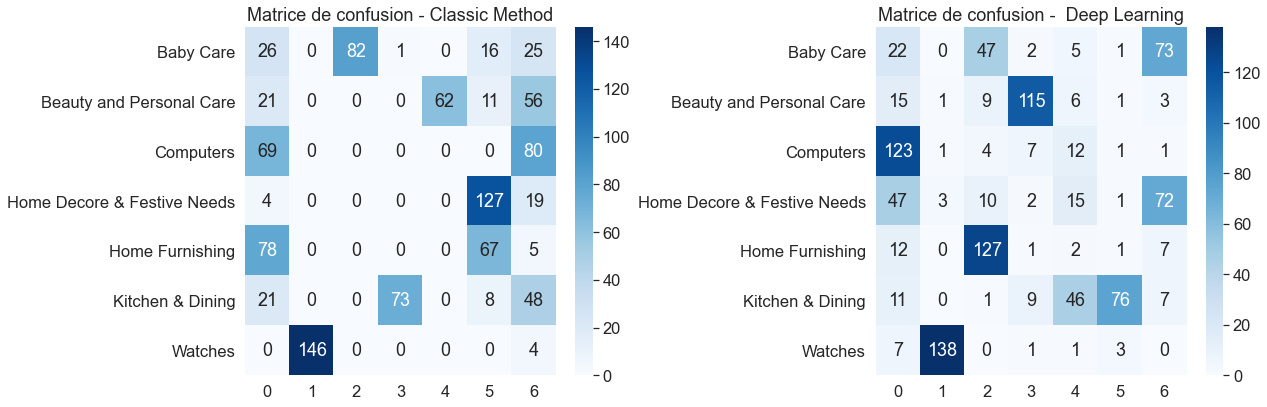

In [109]:
# ================================================Classic Method========================================================#
# Matrice de confusion methode classique
sns.set(style="white", font_scale=1.5)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.heatmap(
    confusion_matrix(label_true, label_pred),
    annot=True,
    fmt="d",
    cmap="Blues",
    yticklabels=[
        "Baby Care",
        "Beauty and Personal Care",
        "Computers",
        "Home Decore & Festive Needs",
        "Home Furnishing",
        "Kitchen & Dining",
        "Watches",
    ],
    ax=ax[0],
)

ax[0].set(title="Matrice de confusion - Classic Method")

# ================================================Deep Learning Method========================================================#
# Matrice de confusion deep learning
sns.heatmap(
    confusion_matrix(label_true, label_pred_dp),
    annot=True,
    fmt="d",
    cmap="Blues",
    yticklabels=[
        "Baby Care",
        "Beauty and Personal Care",
        "Computers",
        "Home Decore & Festive Needs",
        "Home Furnishing",
        "Kitchen & Dining",
        "Watches",
    ],
    ax=ax[1],
)

ax[1].set(title="Matrice de confusion -  Deep Learning")

fig.tight_layout()

<img src='https://scontent.fcdg2-1.fna.fbcdn.net/v/t1.6435-9/154196282_3653559314697389_4174523554590546826_n.jpg?_nc_cat=111&ccb=1-5&_nc_sid=973b4a&_nc_ohc=H_ViRY_Bnu0AX9J5T4F&_nc_ht=scontent.fcdg2-1.fna&oh=9c1e05e851f669bdf5f9077e7b411367&oe=61B85286' width=60px align="right"/> 
<div style="vertical-align: left">
    <h1>
    <font color=#f26430 >Conclusion
        </font>
    </h1>
</div>

- La **mise en place** d'un **moteur** de **classification** des articles en différentes catégories, **est faisable**.
- La **méthode deep learning** et **transfer learning** donne **un meilleur résultat de classification** avec un **minimum** de **temps** et d'**effort** de développement. 
- L'utilisation de la **couche classifier de VGG16** et l'**entrainer sur nos images** permettra d'avoir de **meilleurs résultats**. 